insatll pakages

In [1]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("TCGAbiolinks")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.3 (2024-02-29 ucrt)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'TCGAbiolinks'"
Old packages: 'lattice', 'parsnip', 'performance', 'spatstat.explore',
  'yardstick'



In [1]:
library(tidyverse)
library(TCGAbiolinks)
library(clusterProfiler)
library(pathview)
library(enrichplot)
library(pheatmap)
library(EnhancedVolcano)
# Load organism library
library(org.Hs.eg.db)
# Library for annotation
library(AnnotationDbi)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


clusterProfiler v4.10.1  For help: https://yulab-smu.top/biomedical-knowledge-mining-book/

If you use clusterProfiler in published research, please cite:
T Wu, E Hu, S Xu, M Chen, P Guo, Z Dai, T Feng, L Zhou, W Tang, L Zhan, X Fu, S Liu, X Bo, and G Yu. clusterProfiler 4.0: A universal enrichment tool for interpreting omics data. The Innovation. 2021, 2(3):100141


载入程辑包：'clusterProfiler'


The following object is masked from 'package:purrr':

    simplify


The follo

In [3]:
query <- GDCquery(project = "TCGA-BRCA",
                  data.category = "Transcriptome Profiling",
                  data.type = "Gene Expression Quantification", 
                  workflow.type = "STAR - Counts")

--------------------------------------

o GDCquery: Searching in GDC database

--------------------------------------

Genome of reference: hg38

--------------------------------------------

oo Accessing GDC. This might take a while...

--------------------------------------------

ooo Project: TCGA-BRCA

--------------------

oo Filtering results

--------------------

ooo By data.type

ooo By workflow.type

----------------

oo Checking data

----------------

ooo Checking if there are duplicated cases

ooo Checking if there are results for the query

-------------------

o Preparing output

-------------------



In [4]:
meta.data <- getResults(query)
head(meta.data)

,id,data_format,cases,access,file_name,submitter_id,data_category,type,file_size,created_datetime,⋯,analysis_id,analysis_state,analysis_submitter_id,analysis_workflow_link,analysis_workflow_type,analysis_workflow_version,sample_type,is_ffpe,cases.submitter_id,sample.submitter_id
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>
1,0d140db1-dc0d-431d-b389-846d05bbb827,TSV,TCGA-E9-A1RH-01A-21R-A169-07,open,d0ee5ff7-a49a-4633-93a6-40c9e29fb0b7.rna_seq.augmented_star_gene_counts.tsv,79976f76-a364-40c3-8e75-9281d41a3259,Transcriptome Profiling,gene_expression,4243387,2021-12-13T22:30:58.414992-06:00,⋯,eb87ce9e-8662-45f5-813e-b3cc914ca5a1,released,d0ee5ff7-a49a-4633-93a6-40c9e29fb0b7_star__counts,https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl,STAR - Counts,5d8c131bbff59fb0c969217fc1d44e6d1503cd1f,Primary Tumor,NA,TCGA-E9-A1RH,TCGA-E9-A1RH-01A
2,800ca72f-4bd7-46d7-904b-bcda2fa3500c,TSV,TCGA-C8-A26W-01A-11R-A16F-07,open,c58a5583-7b04-4b67-9372-e161e18d7de1.rna_seq.augmented_star_gene_counts.tsv,16babb86-87b9-4faa-9469-f1bd9d79afba,Transcriptome Profiling,gene_expression,4256989,2021-12-13T22:08:29.274913-06:00,⋯,e7a1f4f0-e04a-4f20-996c-cee283a8f182,released,c58a5583-7b04-4b67-9372-e161e18d7de1_star__counts,https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl,STAR - Counts,5d8c131bbff59fb0c969217fc1d44e6d1503cd1f,Primary Tumor,NA,TCGA-C8-A26W,TCGA-C8-A26W-01A
3,958813f4-8036-42f7-856d-7a69c4175adc,TSV,TCGA-E9-A1RH-11A-34R-A169-07,open,269c35f0-a4f7-4e30-a69f-f1f3b7b5dace.rna_seq.augmented_star_gene_counts.tsv,98ea3aa6-f1cc-4c09-bcdc-8e0af9cb0899,Transcriptome Profiling,gene_expression,4237719,2021-12-13T21:57:30.184115-06:00,⋯,bba6c459-0652-4c97-88d0-b82195228c82,released,269c35f0-a4f7-4e30-a69f-f1f3b7b5dace_star__counts,https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl,STAR - Counts,5d8c131bbff59fb0c969217fc1d44e6d1503cd1f,Solid Tissue Normal,NA,TCGA-E9-A1RH,TCGA-E9-A1RH-11A
4,c7646bc5-436b-4ad5-b5ae-894b2e843cda,TSV,TCGA-AO-A0JJ-01A-11R-A056-07,open,158ab1d9-8925-4a05-95da-b2e0ca297474.rna_seq.augmented_star_gene_counts.tsv,cede3da7-94c9-4e91-94e7-bb211f4eb6ac,Transcriptome Profiling,gene_expression,4246730,2021-12-13T21:53:52.671780-06:00,⋯,752e61ef-6dfe-4a9c-8ada-29a4af481091,released,158ab1d9-8925-4a05-95da-b2e0ca297474_star__counts,https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl,STAR - Counts,5d8c131bbff59fb0c969217fc1d44e6d1503cd1f,Primary Tumor,NA,TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A
5,90e074a0-ca6d-4031-aa26-f79e5c662ba7,TSV,TCGA-BH-A0HO-01A-11R-A034-07,open,9c2ed2bb-8ee1-441e-9f3b-ffbb4def2673.rna_seq.augmented_star_gene_counts.tsv,50a6509a-806b-4a6f-adf3-4b04dd64cf43,Transcriptome Profiling,gene_expression,4244631,2021-12-13T22:41:44.660147-06:00,⋯,c9c819d2-d230-4009-9865-f785c1cccce4,released,9c2ed2bb-8ee1-441e-9f3b-ffbb4def2673_star__counts,https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl,STAR - Counts,5d8c131bbff59fb0c969217fc1d44e6d1503cd1f,Primary Tumor,NA,TCGA-BH-A0HO,TCGA-BH-A0HO-01A
6,ac7c3a38-5d88-488e-86f7-1c72a26fe5ef,TSV,TCGA-BH-A18F-01A-11R-A12D-07,open,11ed8e05-8f30-460a-b502-01ae09504315.rna_seq.augmented_star_gene_counts.tsv,730f7b80-60ed-408d-a8e4-40d220eb7f93,Transcriptome Profiling,gene_expression,4241467,2021-12-13T21:51:55.922691-06:00,⋯,d5b1b3ad-72a6-4921-b1bb-240b79ceddba,released,11ed8e05-8f30-460a-b502-01ae09504315_star__counts,https://github.com/NCI-GDC/gdc-rnaseq-cwl/blob/5d8c131bbff59fb0c969217fc1d44e6d1503cd1f/rnaseq-star-align/star2pass.rnaseq_harmonization.cwl,STAR - Counts,5d8c131

In [5]:
library(here) 
GDCdownload(query, directory = "GDC")

here() starts at D:/OneDrive - National University of Singapore/NUS/2024-Master/5003 Statistics/jupyterlab/Project




GDCdownload will download 1231 files. A total of 5.223473855 GB

The total size of files is big. We will download files in chunks




Downloading: 240 MB       

Downloading: 240 MB     

Downloading: 240 MB     

Downloading: 240 MB     

Downloading: 240 MB       

Downloading: 58 MB      

In [6]:
exp <- GDCprepare(query, directory = "GDC")

|====================================================|100%                      gCompleted after 27 s 


Starting to add information to samples

 => Add clinical information to samples

 => Adding TCGA molecular information from marker papers

 => Information will have prefix 'paper_' 

brca subtype information from:doi.org/10.1016/j.ccell.2018.03.014

Available assays in SummarizedExperiment : 
  => unstranded
  => stranded_first
  => stranded_second
  => tpm_unstrand
  => fpkm_unstrand
  => fpkm_uq_unstrand



In [7]:
save(exp, file = "exp.rda")

In [8]:
library(DESeq2)

载入需要的程辑包：S4Vectors

载入需要的程辑包：stats4

载入需要的程辑包：BiocGenerics


载入程辑包：'BiocGenerics'


The following objects are masked from 'package:lubridate':

    intersect, setdiff, union


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



载入程辑包：'S4Vectors'


The following objects are masked from 'package:lubridate':

    second, second<-


The following objects are masked from 'package:dplyr':

    first, rename


The 

In [9]:
load("exp.rda")

exp

class: RangedSummarizedExperiment 
dim: 60660 1231 
metadata(1): data_release
assays(6): unstranded stranded_first ... fpkm_unstrand fpkm_uq_unstrand
rownames(60660): ENSG00000000003.15 ENSG00000000005.6 ...
  ENSG00000288674.1 ENSG00000288675.1
rowData names(10): source type ... hgnc_id havana_gene
colnames(1231): TCGA-E9-A1RH-01A-21R-A169-07
  TCGA-C8-A26W-01A-11R-A16F-07 ... TCGA-HN-A2OB-01A-21R-A27Q-07
  TCGA-A8-A09M-01A-11R-A00Z-07
colData names(88): barcode patient ... paper_PARADIGM Clusters
  paper_Pan-Gyn Clusters

In [23]:
# Raw count data
count.data <- assay(exp) %>% as.data.frame()

head(count.data)

,TCGA-E9-A1RH-01A-21R-A169-07,TCGA-C8-A26W-01A-11R-A16F-07,TCGA-E9-A1RH-11A-34R-A169-07,TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A18F-01A-11R-A12D-07,TCGA-C8-A12O-01A-11R-A115-07,TCGA-AQ-A04H-01B-11R-A10J-07,TCGA-BH-A0HY-01A-11R-A056-07,TCGA-B6-A40B-01A-11R-A239-07,⋯,TCGA-AR-A1AU-01A-11R-A12P-07,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-EW-A6SC-01A-12R-A32P-07,TCGA-OL-A66I-01A-21R-A29R-07,TCGA-AO-A0JE-01A-11R-A056-07,TCGA-BH-A0AU-01A-11R-A12P-07,TCGA-A8-A09G-01A-21R-A00Z-07,TCGA-E2-A14X-01A-11R-A115-07,TCGA-HN-A2OB-01A-21R-A27Q-07,TCGA-A8-A09M-01A-11R-A00Z-07
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000000003.15,324,4241,3573,3627,292,2146,4278,1085,1372,3870,⋯,1537,3646,1605,2355,2202,1383,2377,7874,4169,522
ENSG00000000005.6,0,13,770,176,9,567,4,1,27,41,⋯,94,12,23,58,4,50,33,22,44,0
ENSG00000000419.13,6231,3226,1607,1810,2038,1677,2609,4375,2135,2115,⋯,1499,2340,1515,3549,1857,2136,2746,3951,1033,3617
ENSG00000000457.14,661,1812,1040,1598,2101,1705,1005,1277,2385,1678,⋯,1482,1355,1014,1335,1705,1396,3120,3720,1163,1512
ENSG00000000460.17,695,1306,215,573,447,896,495,513,1075,581,⋯,492,614,503,1459,559,543,954,1352,296,632
ENSG00000000938.13,333,591,573,676,639,456,625,205,171,609,⋯,318,250,325,1276,718,264,427,848,293,506


In [11]:
clin.data <- colData(exp) %>% as.data.frame()

head(clin.data)

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,sample_type_id,tumor_descriptor,sample_id,sample_type,⋯,paper_tobacco_smoking_history,paper_CNV.Clusters,paper_Mutation.Clusters,paper_DNA.Methylation.Clusters,paper_mRNA.Clusters,paper_miRNA.Clusters,paper_lncRNA.Clusters,paper_Protein.Clusters,paper_PARADIGM.Clusters,paper_Pan.Gyn.Clusters
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TCGA-E9-A1RH-01A-21R-A169-07,TCGA-E9-A1RH-01A-21R-A169-07,TCGA-E9-A1RH,TCGA-E9-A1RH-01A,TP,Primary solid Tumor,TCGA-E9-A1RH-01A,01,Primary,6b1bb382-0103-4207-a0e8-871aa6aae81c,Primary Tumor,⋯,NA,C4,C1,C2,C2,C3,C1,C2,C4,C3
TCGA-C8-A26W-01A-11R-A16F-07,TCGA-C8-A26W-01A-11R-A16F-07,TCGA-C8-A26W,TCGA-C8-A26W-01A,TP,Primary solid Tumor,TCGA-C8-A26W-01A,01,Primary,317b72a8-0332-4db8-b9d1-9a26d9907a24,Primary Tumor,⋯,NA,C6,C4,C1,C2,C2,C2,C2,C4,C4
TCGA-E9-A1RH-11A-34R-A169-07,TCGA-E9-A1RH-11A-34R-A169-07,TCGA-E9-A1RH,TCGA-E9-A1RH-11A,NT,Solid Tissue Normal,TCGA-E9-A1RH-11A,11,Not Applicable,a081f522-7603-4134-90c0-89e70fa43688,Solid Tissue Normal,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A,TP,Primary solid Tumor,TCGA-AO-A0JJ-01A,01,Primary,008dafdd-a3d1-4801-8c0a-8714e2b58e48,Primary Tumor,⋯,NA,C1,C2,C1,C1,C3,C2,C2,C6,C1
TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A0HO,TCGA-BH-A0HO-01A,TP,Primary solid Tumor,TCGA-BH-A0HO-01A,01,Primary,02c8bf84-4816-49a9-b5d1-0edebb8627c7,Primary Tumor,⋯,NA,C1,C4,C1,C1,C3,NA,NA,C5,NA
TCGA-BH-A18F-01A-11R-A12D-07,TCGA-BH-A18F-01A-11R-A12D-07,TCGA-BH-A18F,TCGA-BH-A18F-01A,TP,Primary solid Tumor,TCGA-BH-A18F-01A,01,Primary,adbf4056-e7d4-4282-8771-f2d6029386ab,Primary Tumor,⋯,NA,C1,C4,C1,C1,C3,C2,C1,C6,C1


In [12]:
gene.anno <- rowData(exp) %>% as.data.frame()

head(gene.anno)

,source,type,score,phase,gene_id,gene_type,gene_name,level,hgnc_id,havana_gene
,<fct>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ENSG00000000003.15,HAVANA,gene,NA,NA,ENSG00000000003.15,protein_coding,TSPAN6,2,HGNC:11858,OTTHUMG00000022002.2
ENSG00000000005.6,HAVANA,gene,NA,NA,ENSG00000000005.6,protein_coding,TNMD,2,HGNC:17757,OTTHUMG00000022001.2
ENSG00000000419.13,HAVANA,gene,NA,NA,ENSG00000000419.13,protein_coding,DPM1,2,HGNC:3005,OTTHUMG00000032742.2
ENSG00000000457.14,HAVANA,gene,NA,NA,ENSG00000000457.14,protein_coding,SCYL3,2,HGNC:19285,OTTHUMG00000035941.6
ENSG00000000460.17,HAVANA,gene,NA,NA,ENSG00000000460.17,protein_coding,C1orf112,2,HGNC:25565,OTTHUMG00000035821.9
ENSG00000000938.13,HAVANA,gene,NA,NA,ENSG00000000938.13,protein_coding,FGR,2,HGNC:3697,OTTHUMG00000003516.3


In [13]:
# Local function to print HTML output for display within the notebook
print_html <- function(input) {

capture.output(input) %>% 
paste(collapse="") %>% 
IRdisplay::display_html()
    
}

In [28]:
# Select columns of interest from clinical data
sample.data <- clin.data %>% 
               select(sample_type, race, gender) %>%
               drop_na(gender)

# Summarize columns
gtsummary::tbl_summary(sample.data) %>% print_html()

Characteristic N = 1,230 1 sample_type     Metastatic 7 (0.6%)     Primary Tumor 1,110 (90%)     Solid Tissue Normal 113 (9.2%) race     american indian or alaska native 1 (<0.1%)     asian 62 (5.0%)     black or african american 191 (16%)     not reported 96 (7.8%)     white 880 (72%) gender     female 1,217 (99%)     male 13 (1.1%) 1 n (%)

In [29]:
sample.data <- sample.data %>% 
               mutate(sample_type = recode(sample_type, 
                                     "Primary Tumor" ="tumor", 
                                     "Solid Tissue Normal" = "normal"),
                      race = recode(race, 
                                    "black or african american" = "african_american")
                     ) %>% 
               mutate(sample_type = as.factor(sample_type),
                      race = as.factor(race),
                      gender = as.factor(gender)
                     )

head(sample.data)

,sample_type,race,gender
,<fct>,<fct>,<fct>
TCGA-E9-A1RH-01A-21R-A169-07,tumor,white,female
TCGA-C8-A26W-01A-11R-A16F-07,tumor,asian,female
TCGA-E9-A1RH-11A-34R-A169-07,normal,white,female
TCGA-AO-A0JJ-01A-11R-A056-07,tumor,white,female
TCGA-BH-A0HO-01A-11R-A034-07,tumor,white,female
TCGA-BH-A18F-01A-11R-A12D-07,tumor,white,female


In [30]:
# Extract out the plate (batch) number
sample_id <-  rownames(sample.data) 
batch <- sapply(sample_id, function(x) {strsplit(x, "-")[[1]][6]})

# Add the plate (batch) number
sample.data$batch <- batch

head(sample.data)

,sample_type,race,gender,batch
,<fct>,<fct>,<fct>,<chr>
TCGA-E9-A1RH-01A-21R-A169-07,tumor,white,female,A169
TCGA-C8-A26W-01A-11R-A16F-07,tumor,asian,female,A16F
TCGA-E9-A1RH-11A-34R-A169-07,normal,white,female,A169
TCGA-AO-A0JJ-01A-11R-A056-07,tumor,white,female,A056
TCGA-BH-A0HO-01A-11R-A034-07,tumor,white,female,A034
TCGA-BH-A18F-01A-11R-A12D-07,tumor,white,female,A12D


In [31]:
# Subset only count data with matching same names, then round
count.data <- count.data[, rownames(sample.data)] %>% round()

head(count.data)

,TCGA-E9-A1RH-01A-21R-A169-07,TCGA-C8-A26W-01A-11R-A16F-07,TCGA-E9-A1RH-11A-34R-A169-07,TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A18F-01A-11R-A12D-07,TCGA-C8-A12O-01A-11R-A115-07,TCGA-AQ-A04H-01B-11R-A10J-07,TCGA-BH-A0HY-01A-11R-A056-07,TCGA-B6-A40B-01A-11R-A239-07,⋯,TCGA-AR-A1AU-01A-11R-A12P-07,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-EW-A6SC-01A-12R-A32P-07,TCGA-OL-A66I-01A-21R-A29R-07,TCGA-AO-A0JE-01A-11R-A056-07,TCGA-BH-A0AU-01A-11R-A12P-07,TCGA-A8-A09G-01A-21R-A00Z-07,TCGA-E2-A14X-01A-11R-A115-07,TCGA-HN-A2OB-01A-21R-A27Q-07,TCGA-A8-A09M-01A-11R-A00Z-07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.15,324,4241,3573,3627,292,2146,4278,1085,1372,3870,⋯,1537,3646,1605,2355,2202,1383,2377,7874,4169,522
ENSG00000000005.6,0,13,770,176,9,567,4,1,27,41,⋯,94,12,23,58,4,50,33,22,44,0
ENSG00000000419.13,6231,3226,1607,1810,2038,1677,2609,4375,2135,2115,⋯,1499,2340,1515,3549,1857,2136,2746,3951,1033,3617
ENSG00000000457.14,661,1812,1040,1598,2101,1705,1005,1277,2385,1678,⋯,1482,1355,1014,1335,1705,1396,3120,3720,1163,1512
ENSG00000000460.17,695,1306,215,573,447,896,495,513,1075,581,⋯,492,614,503,1459,559,543,954,1352,296,632
ENSG00000000938.13,333,591,573,676,639,456,625,205,171,609,⋯,318,250,325,1276,718,264,427,848,293,506


In [32]:
# check if columns of count data are the same as sample name
all(colnames(count.data) == rownames(sample.data)) 

[1] TRUE

In [33]:
deseq2Data <- DESeqDataSetFromMatrix(countData = count.data, 
                                     colData = sample.data, 
                                     design = ~ sample_type + gender + race) 

dim(deseq2Data)

converting counts to integer mode

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]



[1] 60660  1230

In [34]:
# Run DESeq2 analysis
dds <- DESeq(deseq2Data)

estimating size factors

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not a warning or an error]

final dispersion estimates

fitting model and testing

139 rows did not converge in beta, labelled in mcols(object)$betaConv. Use larger maxit argument with nbinomWaldTest

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recom

In [2]:
# Perform variance stabilizing transformation on counts
vsd <- vst(dds, blind=FALSE)

ERROR: Error in vst(dds, blind = FALSE): could not find function "vst"


In [1]:
# set plot dimensions
options(repr.plot.width=8, repr.plot.height=8)

# Plot PCA by batch and sample type
plotPCA(vsd, intgroup = c("batch"))

ERROR: Error in plotPCA(vsd, intgroup = c("batch")): could not find function "plotPCA"


In [37]:
# Calculation pair-wise correlations
count.correlation <- cor(count.data)

head(count.correlation)

,TCGA-E9-A1RH-01A-21R-A169-07,TCGA-C8-A26W-01A-11R-A16F-07,TCGA-E9-A1RH-11A-34R-A169-07,TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A18F-01A-11R-A12D-07,TCGA-C8-A12O-01A-11R-A115-07,TCGA-AQ-A04H-01B-11R-A10J-07,TCGA-BH-A0HY-01A-11R-A056-07,TCGA-B6-A40B-01A-11R-A239-07,⋯,TCGA-AR-A1AU-01A-11R-A12P-07,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-EW-A6SC-01A-12R-A32P-07,TCGA-OL-A66I-01A-21R-A29R-07,TCGA-AO-A0JE-01A-11R-A056-07,TCGA-BH-A0AU-01A-11R-A12P-07,TCGA-A8-A09G-01A-21R-A00Z-07,TCGA-E2-A14X-01A-11R-A115-07,TCGA-HN-A2OB-01A-21R-A27Q-07,TCGA-A8-A09M-01A-11R-A00Z-07
TCGA-E9-A1RH-01A-21R-A169-07,1.0000000,0.5765720,0.4146533,0.5098146,0.1750914,0.5697828,0.5421984,0.5141896,0.4850558,0.5375677,⋯,0.5633195,0.5019036,0.5430857,0.4635139,0.5528891,0.5318037,0.5569412,0.3347377,0.4863377,0.4887463
TCGA-C8-A26W-01A-11R-A16F-07,0.5765720,1.0000000,0.7109124,0.8712382,0.2877527,0.9134210,0.8347953,0.8224023,0.8293875,0.8788752,⋯,0.8817739,0.8736269,0.8881069,0.7509768,0.8300251,0.8610892,0.7575845,0.5216998,0.8201603,0.8377283
TCGA-E9-A1RH-11A-34R-A169-07,0.4146533,0.7109124,1.0000000,0.5857508,0.2001041,0.5906479,0.4859692,0.7234301,0.6081938,0.5461802,⋯,0.6894073,0.7074673,0.5817796,0.3632050,0.4775757,0.5644390,0.6521711,0.4129920,0.4971218,0.8475004
TCGA-AO-A0JJ-01A-11R-A056-07,0.5098146,0.8712382,0.5857508,1.0000000,0.3038206,0.8866332,0.7809719,0.7120602,0.7210157,0.8117399,⋯,0.8330489,0.7935510,0.8342558,0.7442359,0.7780475,0.7909463,0.7134775,0.5787051,0.8031263,0.7490452
TCGA-BH-A0HO-01A-11R-A034-07,0.1750914,0.2877527,0.2001041,0.3038206,1.0000000,0.2864754,0.2570807,0.2657152,0.2510921,0.2591810,⋯,0.3063637,0.2806184,0.2661292,0.2539997,0.2367314,0.2570840,0.2627777,0.1666547,0.2419208,0.2814879
TCGA-BH-A18F-01A-11R-A12D-07,0.5697828,0.9134210,0.5906479,0.8866332,0.2864754,1.0000000,0.9029346,0.7668430,0.8174796,0.9011610,⋯,0.8945677,0.8189887,0.9343719,0.7818689,0.8830396,0.9002979,0.7071517,0.5056128,0.8963347,0.7263874


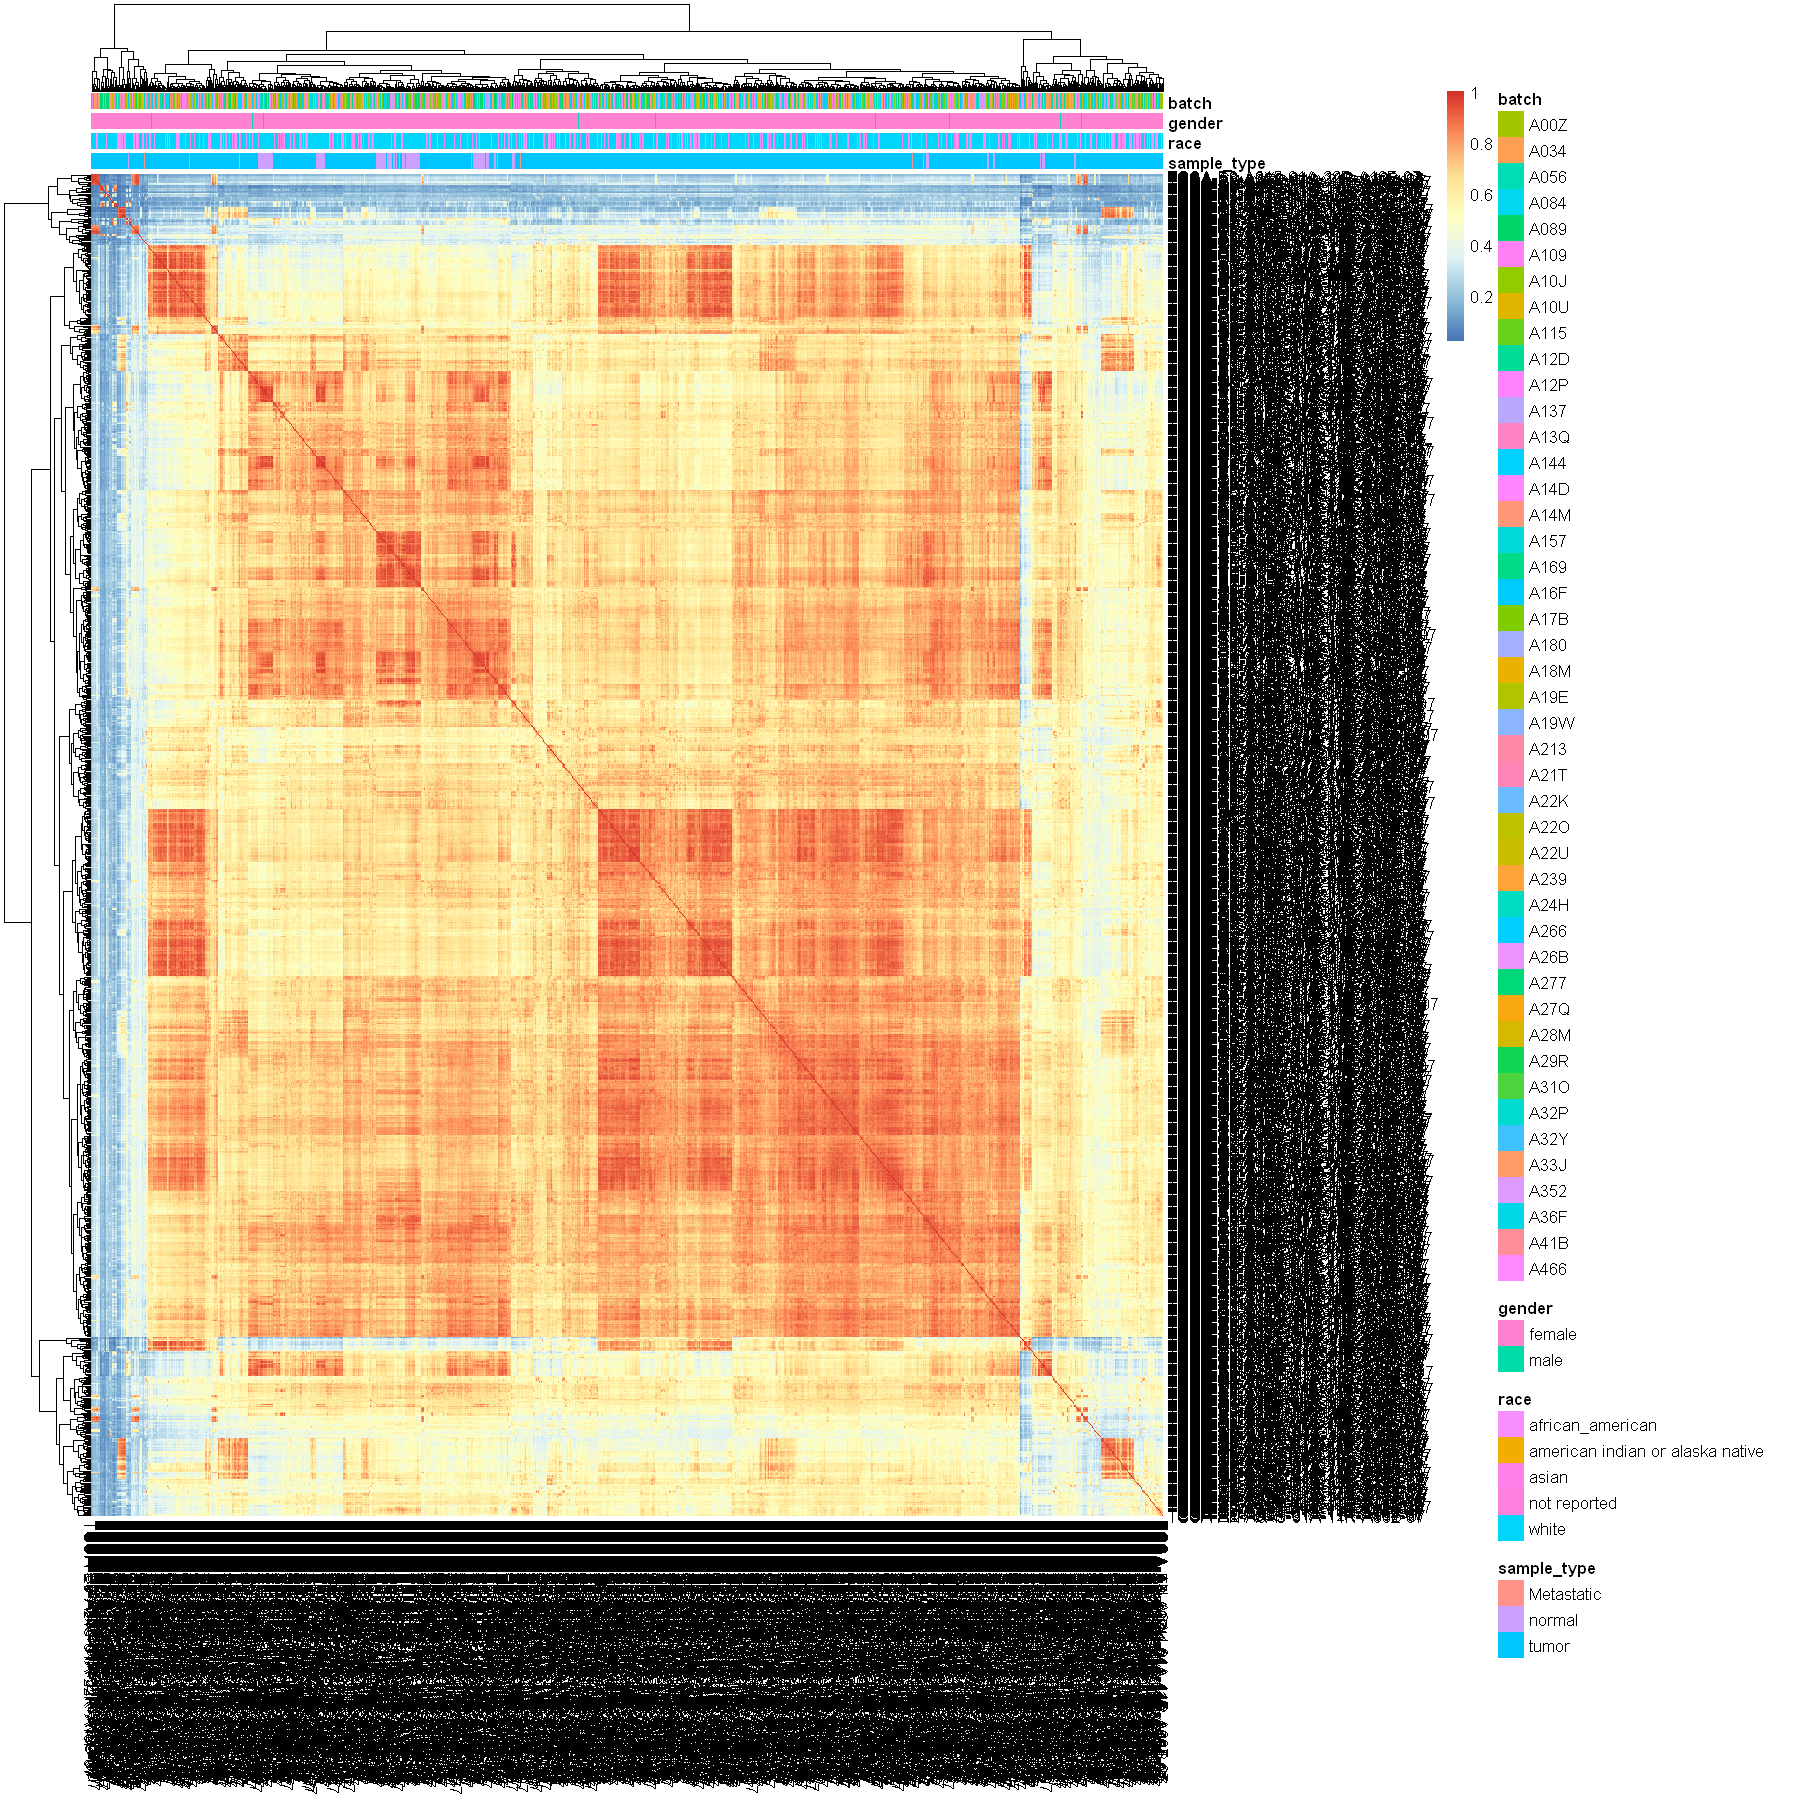

In [38]:
# Set plot dimnesions
options(repr.plot.width = 15, repr.plot.height = 15)

# Plot
pheatmap(count.correlation, 
         annotation_col = sample.data, 
         show_colnames = T, 
         show_rownames = T)

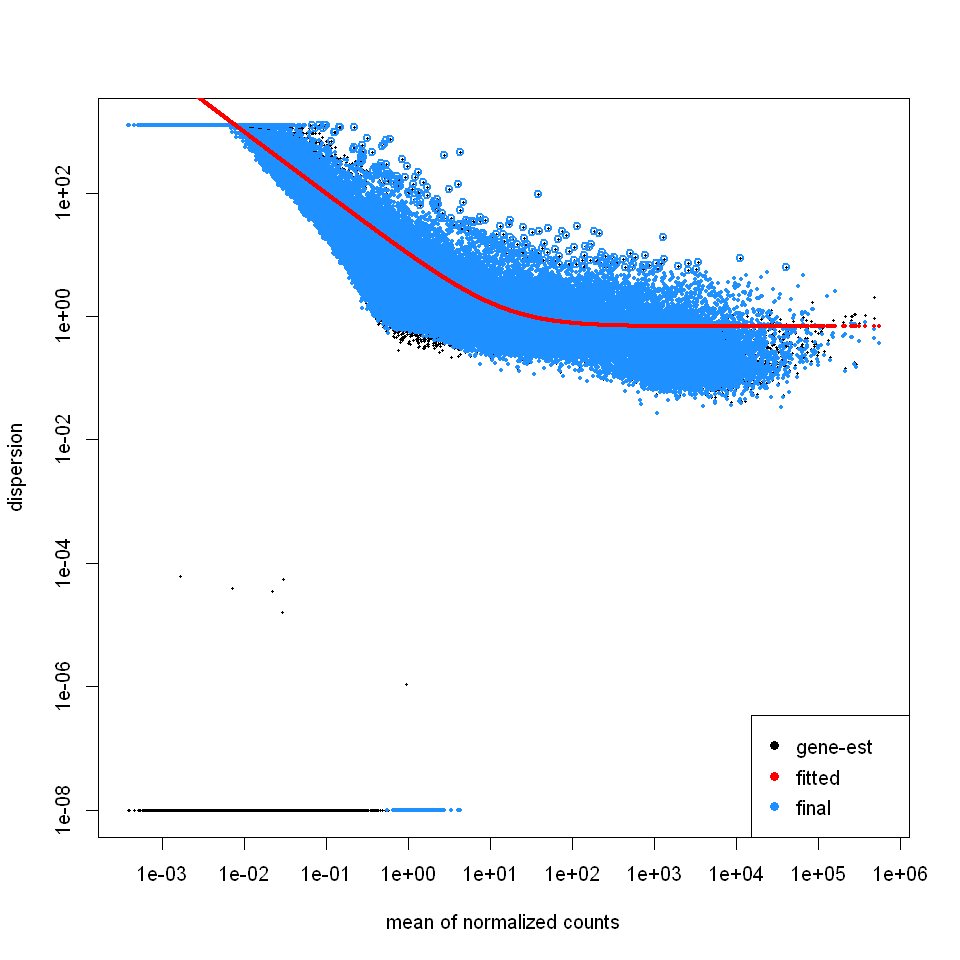

In [39]:
# Set plot dimensions
options(repr.plot.width = 8, repr.plot.height = 8)

# Plot dispersion
plotDispEsts(dds)

In [40]:
# Get results based on contrast
res.DESeq2 <- results(dds, 
                      contrast=c("sample_type", "tumor", "normal")) 
summary(res.DESeq2)


out of 58048 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 19802, 34%
LFC < 0 (down)     : 11275, 19%
outliers [1]       : 121, 0.21%
low counts [2]     : 11225, 19%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



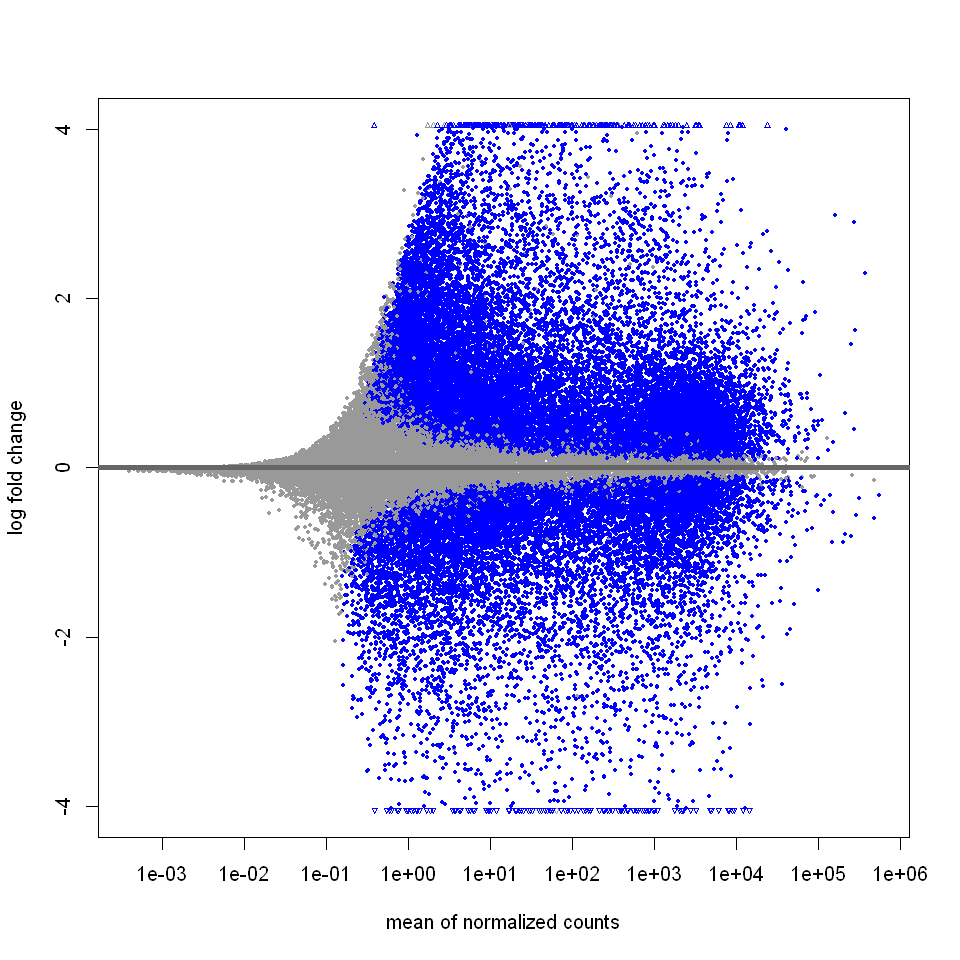

In [41]:
# set plot dimensions
options(repr.plot.width=8, repr.plot.height=8)

plotMA(res.DESeq2)

In [42]:
# Shrink log2 fold
res.shrink.DESeq2 <- lfcShrink(dds, 
                               contrast=c("sample_type", "tumor", "normal"), 
                               type="ashr")

using 'ashr' for LFC shrinkage. If used in published research, please cite:
    Stephens, M. (2016) False discovery rates: a new deal. Biostatistics, 18:2.
    https://doi.org/10.1093/biostatistics/kxw041



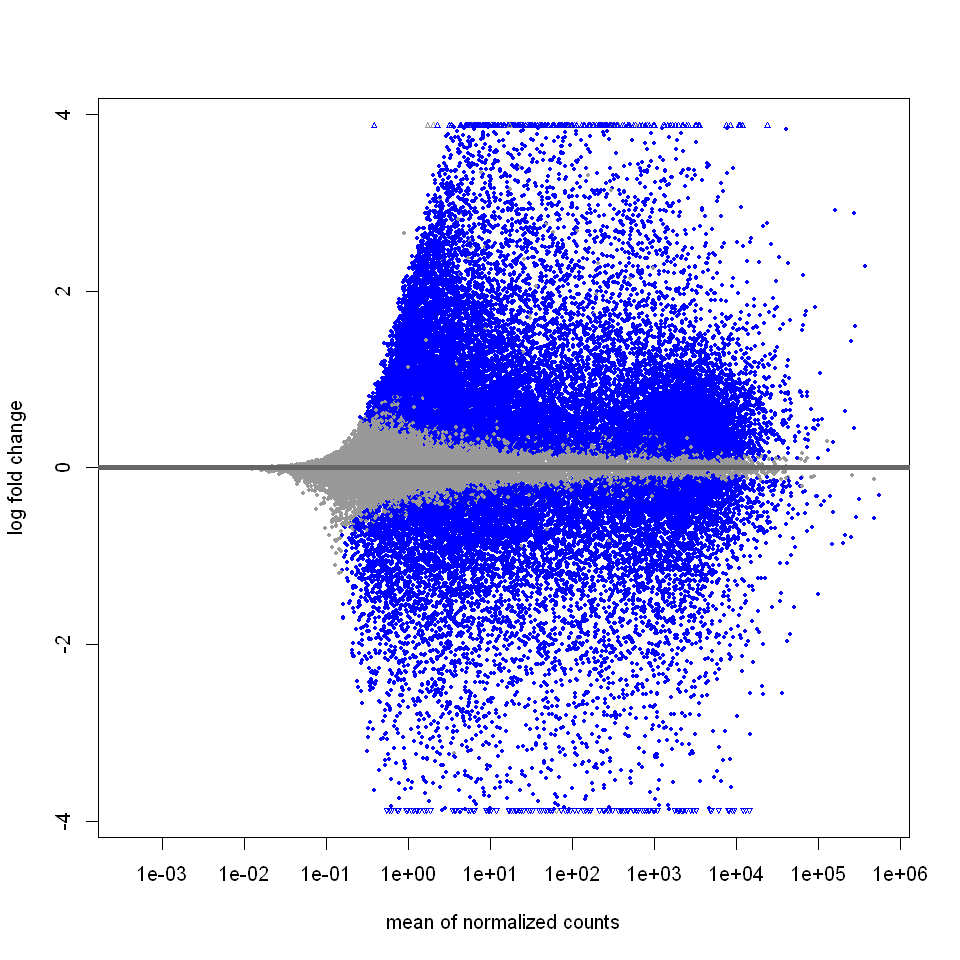

In [43]:
# set plot dimensions
options(repr.plot.width=8, repr.plot.height=8)

plotMA(res.shrink.DESeq2)

In [44]:
# Convert to dataframe
res.df <- as.data.frame(res.shrink.DESeq2)

head(res.df)

,baseMean,log2FoldChange,lfcSE,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.15,3104.3324,-0.5609732,0.09306318,7.670342e-10,2.803853e-09
ENSG00000000005.6,153.6680,-3.1697081,0.24823668,6.981844e-39,1.101203e-37
ENSG00000000419.13,2305.1060,0.4214970,0.05604572,3.427589e-14,1.693202e-13
ENSG00000000457.14,1569.1278,0.4136517,0.05598954,9.504537e-14,4.565267e-13
ENSG00000000460.17,694.5149,1.3133590,0.07646141,2.637977e-67,1.075033e-65
ENSG00000000938.13,578.4283,-0.4588758,0.10097833,3.160843e-06,8.439637e-06


In [45]:
# Get the gene_id and gene_name
gene.anno <- gene.anno %>% 
             select(gene_id, gene_name, gene_type) 

head(gene.anno)

,gene_id,gene_name,gene_type
,<chr>,<chr>,<chr>
ENSG00000000003.15,ENSG00000000003.15,TSPAN6,protein_coding
ENSG00000000005.6,ENSG00000000005.6,TNMD,protein_coding
ENSG00000000419.13,ENSG00000000419.13,DPM1,protein_coding
ENSG00000000457.14,ENSG00000000457.14,SCYL3,protein_coding
ENSG00000000460.17,ENSG00000000460.17,C1orf112,protein_coding
ENSG00000000938.13,ENSG00000000938.13,FGR,protein_coding


In [46]:
# Join DE results with gene names
res.df <- res.df %>% 
          rownames_to_column("gene_id") %>% 
          left_join(gene.anno, by="gene_id")

head(res.df)

,gene_id,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene_name,gene_type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSG00000000003.15,3104.3324,-0.5609732,0.09306318,7.670342e-10,2.803853e-09,TSPAN6,protein_coding
2,ENSG00000000005.6,153.6680,-3.1697081,0.24823668,6.981844e-39,1.101203e-37,TNMD,protein_coding
3,ENSG00000000419.13,2305.1060,0.4214970,0.05604572,3.427589e-14,1.693202e-13,DPM1,protein_coding
4,ENSG00000000457.14,1569.1278,0.4136517,0.05598954,9.504537e-14,4.565267e-13,SCYL3,protein_coding
5,ENSG00000000460.17,694.5149,1.3133590,0.07646141,2.637977e-67,1.075033e-65,C1orf112,protein_coding
6,ENSG00000000938.13,578.4283,-0.4588758,0.10097833,3.160843e-06,8.439637e-06,FGR,protein_coding


In [47]:
# Check number of genes
dim(res.df)

# Filter only protein_coding genes
res.df <- res.df %>% 
          filter(gene_type == "protein_coding")

# Check number of remaining genes
dim(res.df)

[1] 60660     8

[1] 19962     8

In [48]:
any(duplicated(res.df$gene_name))

[1] TRUE

In [49]:
# Filter duplicated gene names
dup_gene_names <- res.df %>% 
                  filter(duplicated(gene_name)) %>% 
                  pull(gene_name)

# See duplicated gene names
res.df %>% filter(gene_name %in% dup_gene_names)

gene_id,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene_name,gene_type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSG00000002586.20,1.085393e+04,-0.0174394285,0.08189742,8.276679e-01,8.735902e-01,CD99,protein_coding
ENSG00000002586.20_PAR_Y,0.000000e+00,0.0000000000,1.06806628,NA,NA,CD99,protein_coding
ENSG00000015479.20,2.157209e+02,0.3671515467,0.12278111,1.862356e-03,3.600436e-03,MATR3,protein_coding
ENSG00000124333.16,3.229795e+03,0.0659198043,0.04999944,1.830351e-01,2.487373e-01,VAMP7,protein_coding
ENSG00000124333.16_PAR_Y,0.000000e+00,0.0000000000,1.06806628,NA,NA,VAMP7,protein_coding
ENSG00000124334.17,1.625809e+01,1.9921777277,0.14796131,2.382265e-42,4.285868e-41,IL9R,protein_coding
ENSG00000124334.17_PAR_Y,0.000000e+00,0.0000000000,1.06806628,NA,NA,IL9R,protein_coding
ENSG00000128655.18,1.254489e+02,-2.3005067297,0.14294419,2.990751e-59,9.380394e-58,PDE11A,protein_coding
ENSG00000158427.15,1.907633e+01,0.8192312450,0.15429876,2.621299e-08,8.453246e-08,TMSB15B,protein_coding


In [50]:
# Sort pvalues from lowest to highest, then pick the lowest
res.df <- res.df %>%
          arrange(padj) %>% 
          distinct(gene_name, .keep_all = TRUE)

# Check gene names for duplication
res.df %>% filter(gene_name %in% dup_gene_names)

# Check if any more duplications
any(duplicated(res.df$gene_name))

gene_id,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene_name,gene_type
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
ENSG00000128655.18,1.254489e+02,-2.30050673,0.14294419,2.990751e-59,9.380394e-58,PDE11A,protein_coding
ENSG00000124334.17,1.625809e+01,1.99217773,0.14796131,2.382265e-42,4.285868e-41,IL9R,protein_coding
ENSG00000185960.14,3.081700e+00,-2.02532997,0.21101754,7.060880e-23,5.561768e-22,SHOX,protein_coding
ENSG00000185291.12,6.239551e+02,-0.63991436,0.07880574,1.785837e-16,1.008125e-15,IL3RA,protein_coding
ENSG00000169084.15,1.410484e+03,0.41261714,0.05781511,6.097569e-13,2.783119e-12,DHRSX,protein_coding
ENSG00000285437.1,1.684119e+01,0.81338300,0.14150097,2.193187e-09,7.739627e-09,POLR2J3,protein_coding
ENSG00000158427.15,1.907633e+01,0.81923124,0.15429876,2.621299e-08,8.453246e-08,TMSB15B,protein_coding
ENSG00000198223.17,5.646007e+02,-0.43872017,0.10270927,1.156219e-05,2.914542e-05,CSF2RA,protein_coding
ENSG00000182162.11,4.406864e+02,0.47128421,0.11568804,2.569538e-05,6.231633e-05,P2RY8,protein_coding


[1] FALSE

In [51]:
# Filter by p-value and log2 fold change
deg.df <- res.df %>% 
          filter(padj < 0.05) %>% 
          filter(abs(log2FoldChange) > 1) 

head(deg.df)

,gene_id,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene_name,gene_type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSG00000099953.10,24128.713,6.209371,0.1444367,0.000000e+00,0.000000e+00,MMP11,protein_coding
2,ENSG00000101605.13,557.879,-4.729958,0.1231026,0.000000e+00,0.000000e+00,MYOM1,protein_coding
3,ENSG00000119927.14,4805.515,-4.286995,0.1045970,0.000000e+00,0.000000e+00,GPAM,protein_coding
4,ENSG00000123500.10,8508.502,7.105913,0.1562923,0.000000e+00,0.000000e+00,COL10A1,protein_coding
5,ENSG00000117650.13,1467.549,4.157178,0.1121924,9.186478e-303,8.580538e-299,NEK2,protein_coding
6,ENSG00000022267.19,9043.842,-4.925569,0.1406956,2.732241e-271,1.822873e-267,FHL1,protein_coding


In [52]:
# Upregulated genes
deg.up <- deg.df %>% 
          filter(padj < 0.05) %>% 
          filter(log2FoldChange > 1) %>%  
          arrange(padj)

# Downregulatd genes
deg.down <- deg.df %>% 
            filter(padj < 0.05) %>% 
            filter(log2FoldChange < -1) %>%  
            arrange(padj)

head(deg.up)
head(deg.down)

,gene_id,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene_name,gene_type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSG00000099953.10,24128.713,6.209371,0.1444367,0.000000e+00,0.000000e+00,MMP11,protein_coding
2,ENSG00000123500.10,8508.502,7.105913,0.1562923,0.000000e+00,0.000000e+00,COL10A1,protein_coding
3,ENSG00000117650.13,1467.549,4.157178,0.1121924,9.186478e-303,8.580538e-299,NEK2,protein_coding
4,ENSG00000060718.22,11993.748,6.149808,0.1778572,1.898304e-265,9.850513e-262,COL11A1,protein_coding
5,ENSG00000090889.12,1539.004,3.739803,0.1121651,1.069976e-245,4.997002e-242,KIF4A,protein_coding
6,ENSG00000127564.17,922.351,3.784278,0.1146965,1.043166e-240,4.059830e-237,PKMYT1,protein_coding


,gene_id,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene_name,gene_type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSG00000101605.13,557.8790,-4.729958,0.12310257,0.000000e+00,0.000000e+00,MYOM1,protein_coding
2,ENSG00000119927.14,4805.5151,-4.286995,0.10459695,0.000000e+00,0.000000e+00,GPAM,protein_coding
3,ENSG00000022267.19,9043.8420,-4.925569,0.14069561,2.732241e-271,1.822873e-267,FHL1,protein_coding
4,ENSG00000079308.19,15028.0313,-3.015924,0.08675633,3.422968e-266,1.998243e-262,TNS1,protein_coding
5,ENSG00000133800.9,753.8624,-4.828455,0.14585296,4.905253e-243,2.082592e-239,LYVE1,protein_coding
6,ENSG00000095637.22,6556.4347,-3.546585,0.11101732,9.299865e-226,3.102302e-222,SORBS1,protein_coding


载入需要的程辑包：ggrepel

Warning message:
"One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value..."


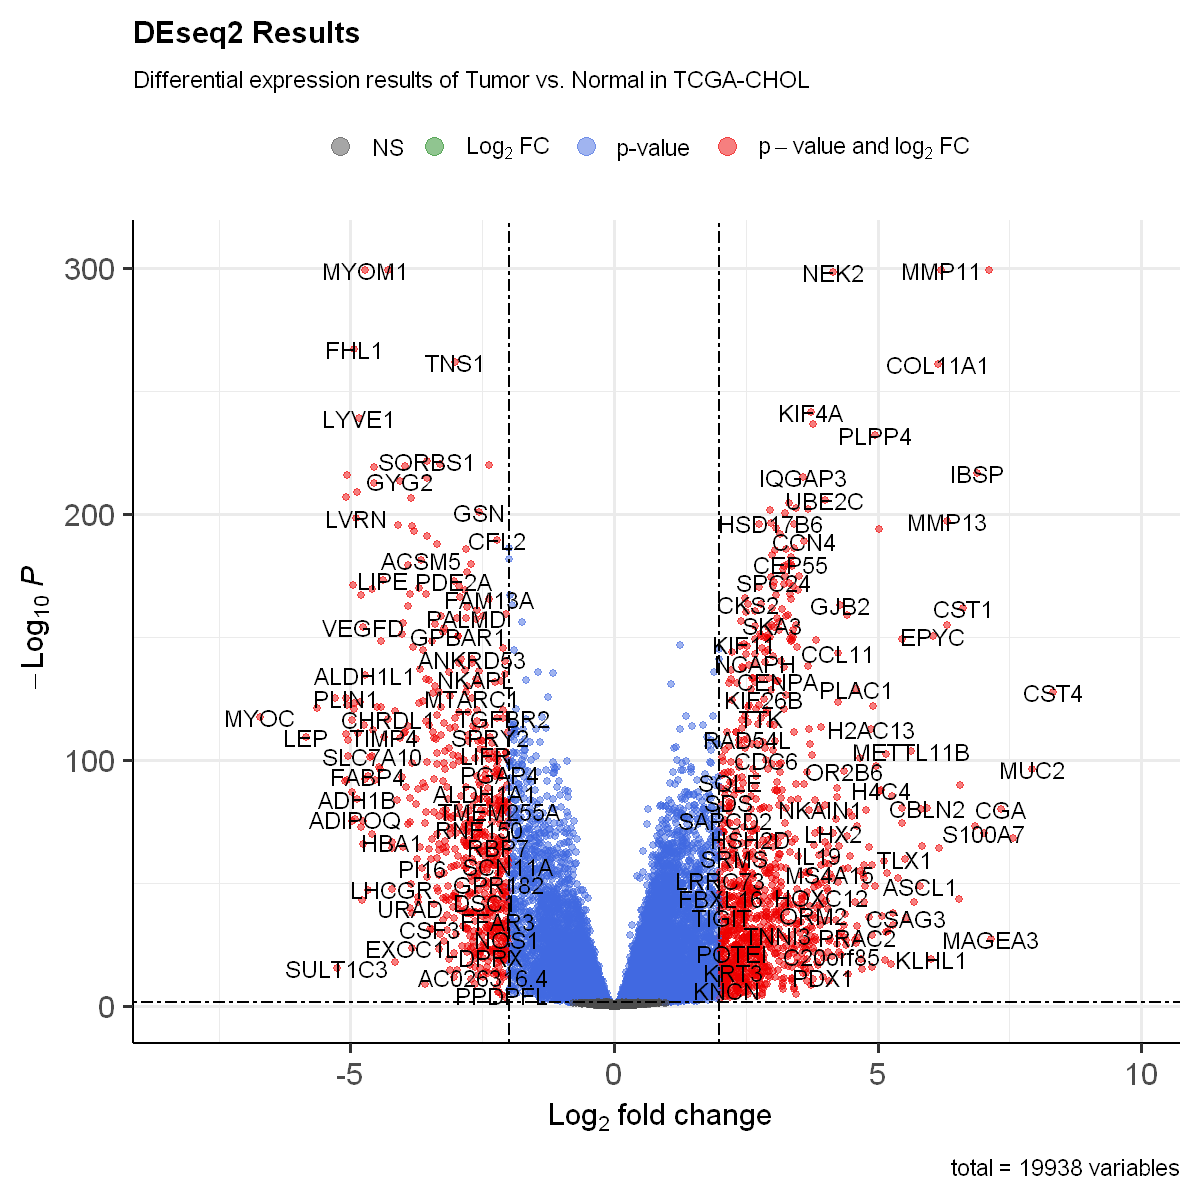

In [53]:
# set plot dimensions
options(repr.plot.width=10, repr.plot.height=10)

# Plot
EnhancedVolcano(res.df,
                lab = res.df$gene_name,
                x = 'log2FoldChange',
                y = 'padj',
                pCutoff = 0.05,
                FCcutoff = 2,
                cutoffLineType = 'twodash',
                cutoffLineWidth = 0.8,
                title = 'DEseq2 Results',
                subtitle = "Differential expression results of Tumor vs. Normal in TCGA-CHOL"
               )

Warning message:
"One or more p-values is 0. Converting to 10^-1 * current lowest non-zero p-value..."


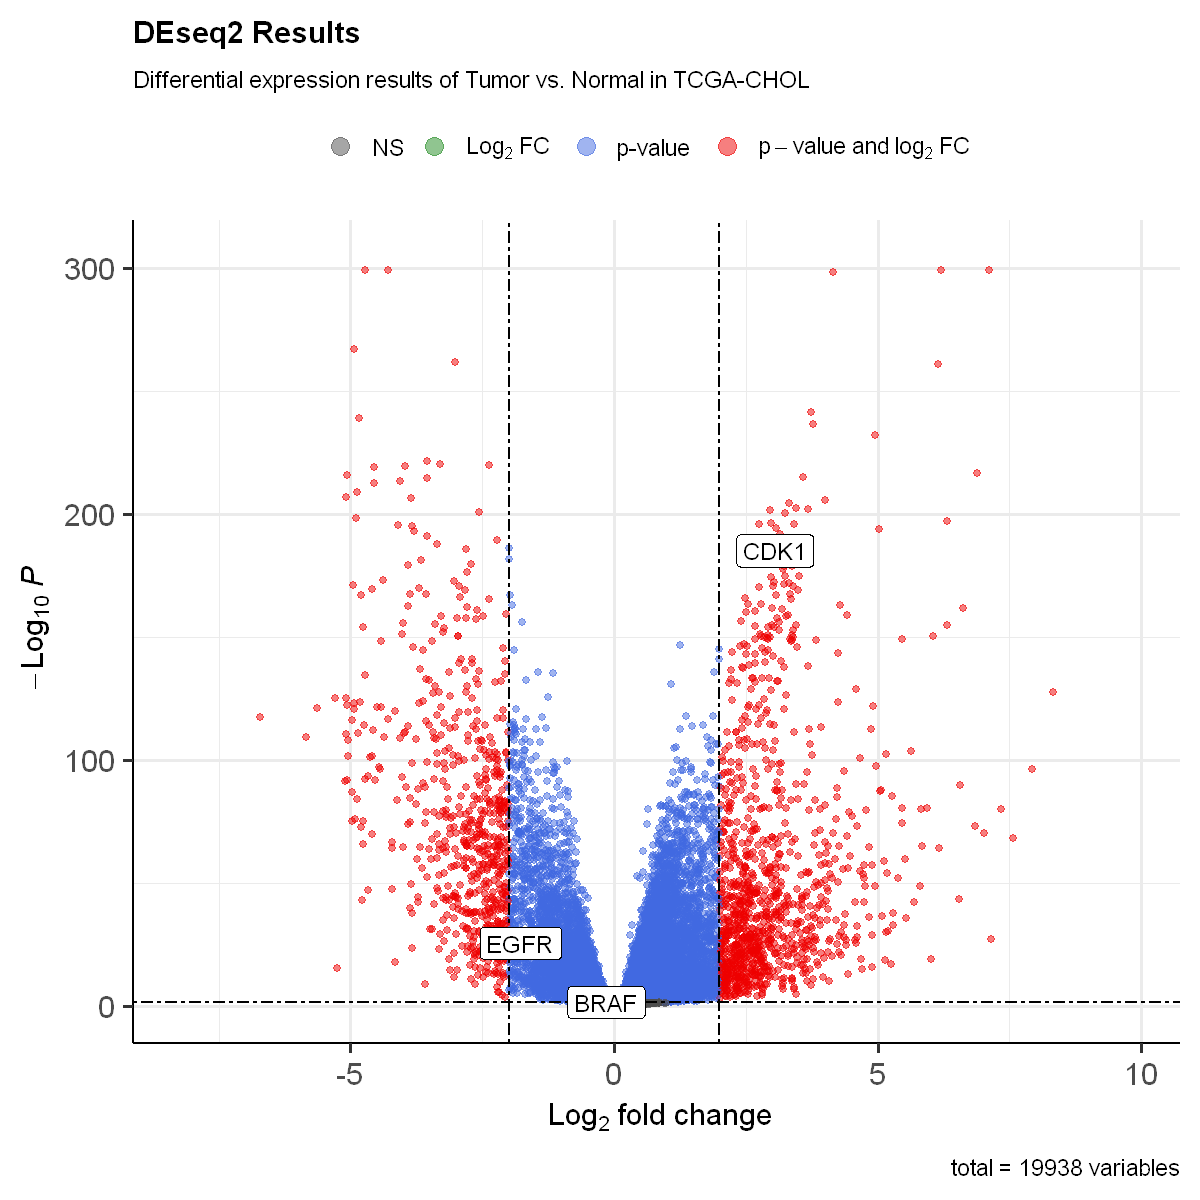

In [54]:
# Highlighting gene(s)
EnhancedVolcano(res.df,
                lab = res.df$gene_name,
                 selectLab = c('CDK1', 'EGFR', 'BRAF'),
                             labSize = 5.0, 
                  boxedLabels = TRUE,
                x = 'log2FoldChange',
                y = 'padj',
                pCutoff = 0.05,
                FCcutoff = 2,
                cutoffLineType = 'twodash',
                cutoffLineWidth = 0.8,
                title = 'DEseq2 Results',
                subtitle = "Differential expression results of Tumor vs. Normal in TCGA-CHOL"
               )

In [55]:
# Perform variance stabilizing transformation
vsd <- vst(dds, blind=FALSE)

vsd.df <- assay(vsd) %>% 
          as.data.frame()

# Subset the top 50 up and downregulated genes
df.hm <- vsd.df[c(deg.up$gene_id[1:50], deg.down$gene_id[1:50]), ]
rownames(df.hm) <- c(deg.up$gene_name[1:50], deg.down$gene_name[1:50])

head(df.hm)

,TCGA-E9-A1RH-01A-21R-A169-07,TCGA-C8-A26W-01A-11R-A16F-07,TCGA-E9-A1RH-11A-34R-A169-07,TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A18F-01A-11R-A12D-07,TCGA-C8-A12O-01A-11R-A115-07,TCGA-AQ-A04H-01B-11R-A10J-07,TCGA-BH-A0HY-01A-11R-A056-07,TCGA-B6-A40B-01A-11R-A239-07,⋯,TCGA-AR-A1AU-01A-11R-A12P-07,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-EW-A6SC-01A-12R-A32P-07,TCGA-OL-A66I-01A-21R-A29R-07,TCGA-AO-A0JE-01A-11R-A056-07,TCGA-BH-A0AU-01A-11R-A12P-07,TCGA-A8-A09G-01A-21R-A00Z-07,TCGA-E2-A14X-01A-11R-A115-07,TCGA-HN-A2OB-01A-21R-A27Q-07,TCGA-A8-A09M-01A-11R-A00Z-07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MMP11,15.08347,12.94130,8.195933,11.823747,12.611907,14.78328,15.38154,12.81956,14.28965,15.89716,⋯,16.656202,14.70670,16.36069,14.10484,15.79960,15.179225,11.326394,12.511569,14.356044,14.81527
COL10A1,13.10193,12.83034,6.741619,12.285033,11.459272,13.06597,14.77203,10.05697,13.46227,13.23736,⋯,12.868522,12.73775,13.68296,12.50376,14.74138,13.947061,11.102216,10.569772,13.129175,12.64987
NEK2,10.87999,11.11535,6.174680,10.251394,9.571552,11.29555,10.45794,11.08624,11.75886,10.99440,⋯,10.109377,9.82973,10.98369,10.72278,10.16544,10.950769,10.867110,11.249803,7.269487,10.19239
COL11A1,15.20041,12.15174,6.264805,10.221886,12.875196,12.69271,15.21934,11.42959,14.09205,14.05852,⋯,11.616901,11.18090,13.78759,12.73097,15.78786,14.335072,12.113749,8.243136,11.948639,12.80884
KIF4A,12.24908,11.52619,6.328788,10.261469,9.842314,11.33276,11.18134,11.05343,10.61002,10.00118,⋯,10.443451,11.07035,11.04947,11.36476,10.39064,11.085195,11.049009,11.154596,7.637594,10.12079
PKMYT1,10.68307,10.70515,5.198220,8.977711,7.744925,10.77168,10.33368,10.50491,10.83560,10.86002,⋯,8.881826,12.02041,10.51743,11.53284,10.71661,9.261697,9.979018,9.828605,7.412733,10.16773


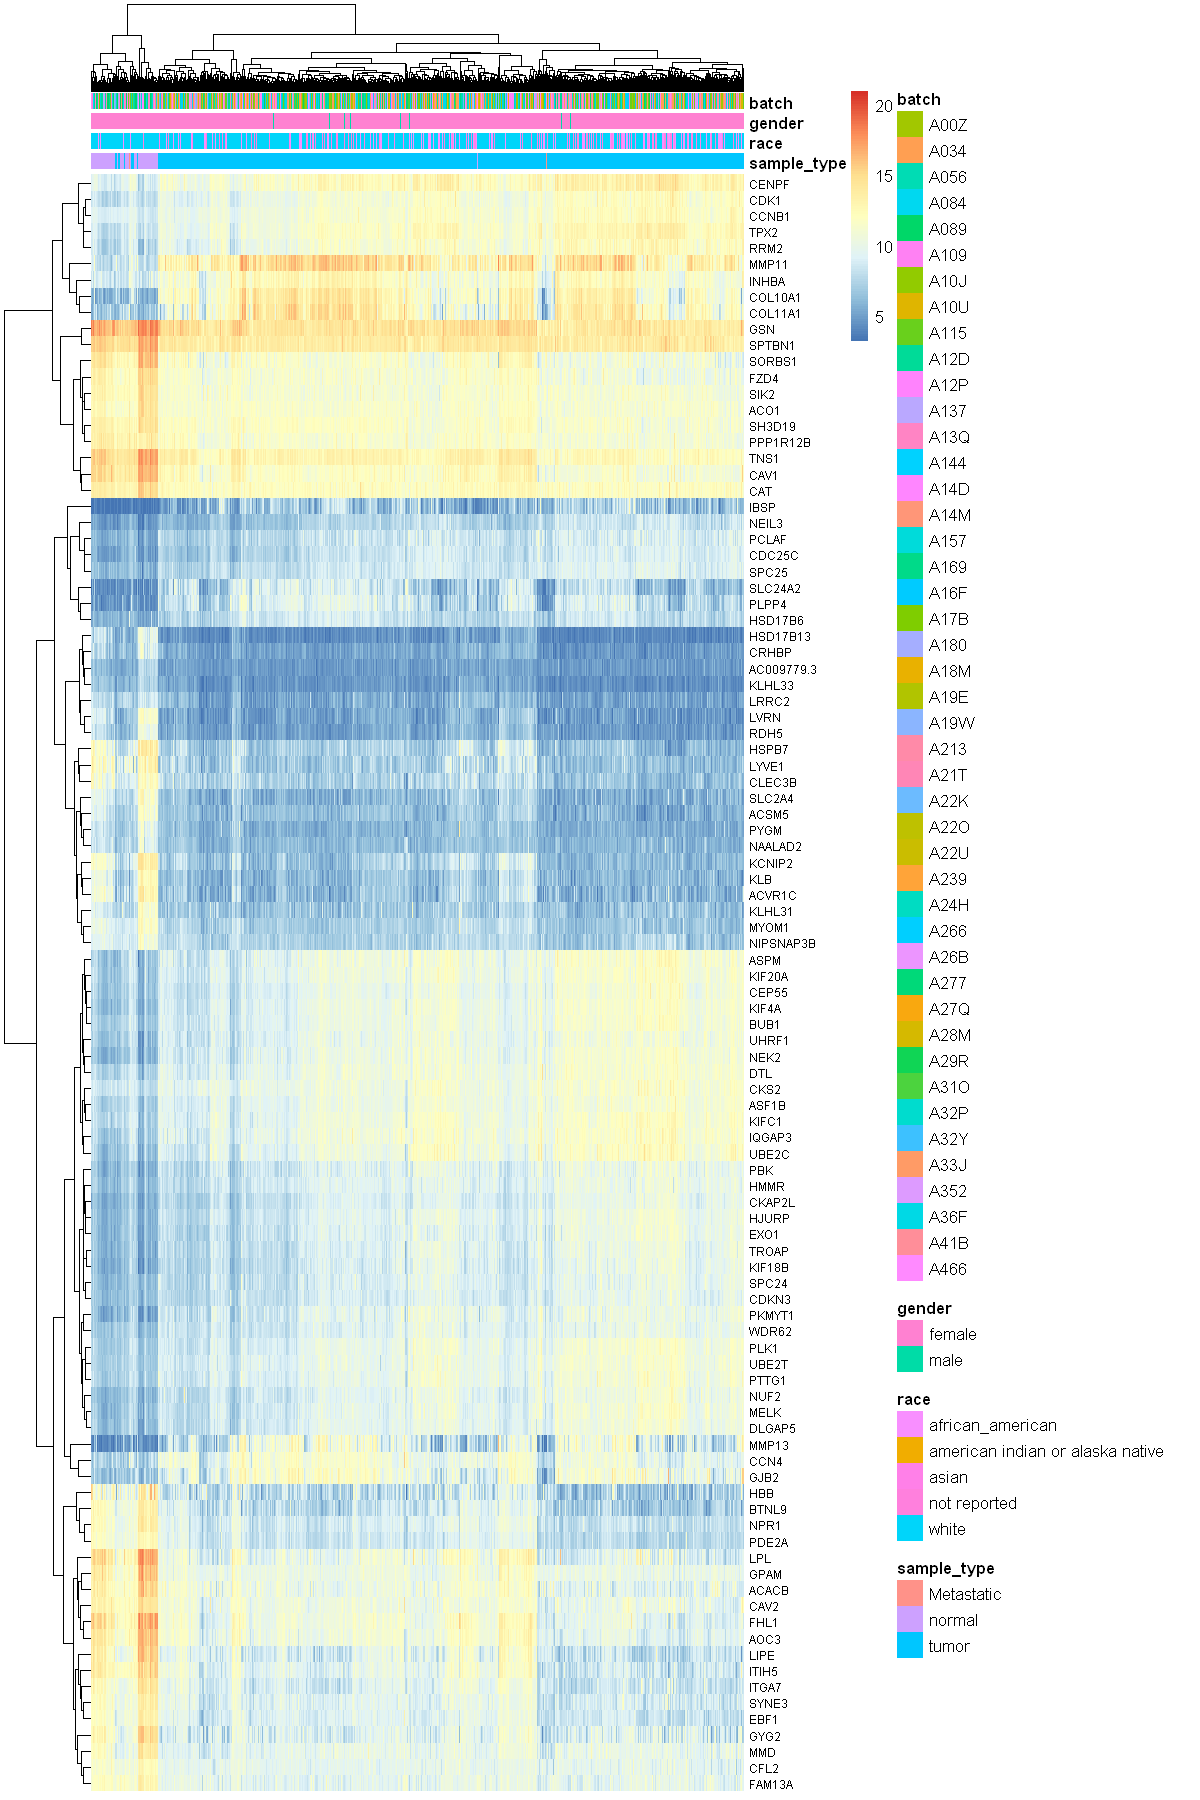

In [56]:
# Set plot dimnesions
options(repr.plot.width = 10, repr.plot.height = 15)

# Plot
pheatmap(df.hm, 
         annotation_col = sample.data, 
         show_colnames = F, 
         show_rownames = T, 
         fontsize_row = 7)

In [57]:
write.table(res.df,"results_DESeq2.tsv", sep="\t", quote = F, col.names = T, row.names = F)
write.table(deg.df,"results_DEGs_DESeq2.tsv", sep="\t", quote = F, col.names = T, row.names = F)
write.table(vsd.df, "exp_vsd.tsv", sep="\t", quote = F, col.names = T, row.names = T) 

In [59]:
deg.df <- read.delim("results_DEGs_DESeq2.tsv")

head(deg.df)

,gene_id,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene_name,gene_type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSG00000099953.10,24128.713,6.209371,0.1444367,0.000000e+00,0.000000e+00,MMP11,protein_coding
2,ENSG00000101605.13,557.879,-4.729958,0.1231026,0.000000e+00,0.000000e+00,MYOM1,protein_coding
3,ENSG00000119927.14,4805.515,-4.286995,0.1045970,0.000000e+00,0.000000e+00,GPAM,protein_coding
4,ENSG00000123500.10,8508.502,7.105913,0.1562923,0.000000e+00,0.000000e+00,COL10A1,protein_coding
5,ENSG00000117650.13,1467.549,4.157178,0.1121924,9.186478e-303,8.580538e-299,NEK2,protein_coding
6,ENSG00000022267.19,9043.842,-4.925569,0.1406956,2.732241e-271,1.822873e-267,FHL1,protein_coding


In [60]:
# Filter significant up-regulated genes
deg.up <- deg.df %>% 
          filter(padj < 0.05) %>%        
          filter(log2FoldChange > 1) %>%  
          arrange(padj)

head(deg.up)

,gene_id,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene_name,gene_type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSG00000099953.10,24128.713,6.209371,0.1444367,0.000000e+00,0.000000e+00,MMP11,protein_coding
2,ENSG00000123500.10,8508.502,7.105913,0.1562923,0.000000e+00,0.000000e+00,COL10A1,protein_coding
3,ENSG00000117650.13,1467.549,4.157178,0.1121924,9.186478e-303,8.580538e-299,NEK2,protein_coding
4,ENSG00000060718.22,11993.748,6.149808,0.1778572,1.898304e-265,9.850513e-262,COL11A1,protein_coding
5,ENSG00000090889.12,1539.004,3.739803,0.1121651,1.069976e-245,4.997002e-242,KIF4A,protein_coding
6,ENSG00000127564.17,922.351,3.784278,0.1146965,1.043166e-240,4.059830e-237,PKMYT1,protein_coding


In [61]:
# GO enrichment analysis
ego <- enrichGO(deg.up$gene_name,
                keyType = "SYMBOL",
                OrgDb = "org.Hs.eg.db",
                minGSSize = 10, 
                maxGSSize = 500,
                pAdjustMethod = "BH",
                pvalueCutoff  = 0.05,
                qvalueCutoff  = 0.25,
                ont="BP",
                readable = TRUE
                )

载入需要的程辑包：AnnotationDbi


载入程辑包：'AnnotationDbi'


The following object is masked from 'package:clusterProfiler':

    select


The following object is masked from 'package:dplyr':

    select






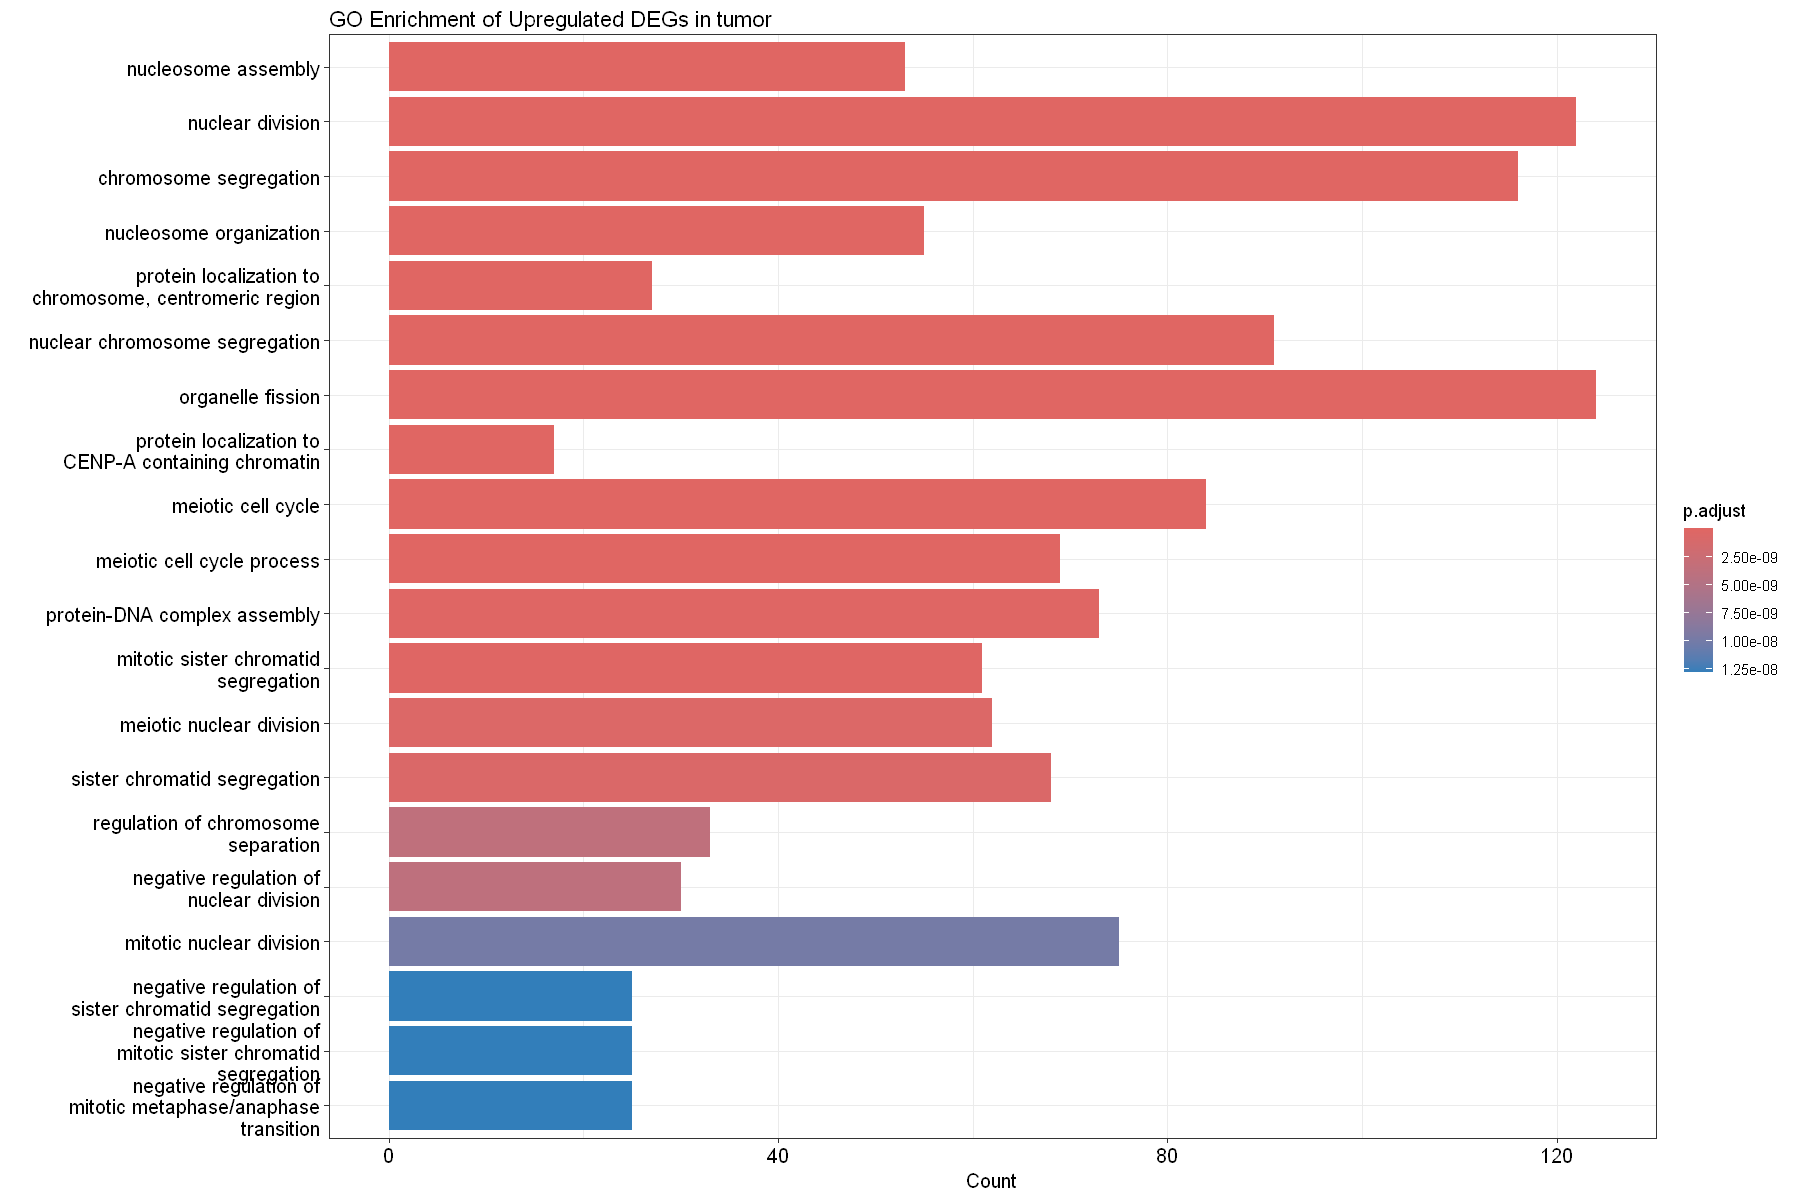

In [62]:
# Set plot dimensions
options(repr.plot.width = 15, repr.plot.height = 10)

# Barplot
barplot(ego, showCategory=20) + ggtitle("GO Enrichment of Upregulated DEGs in tumor")

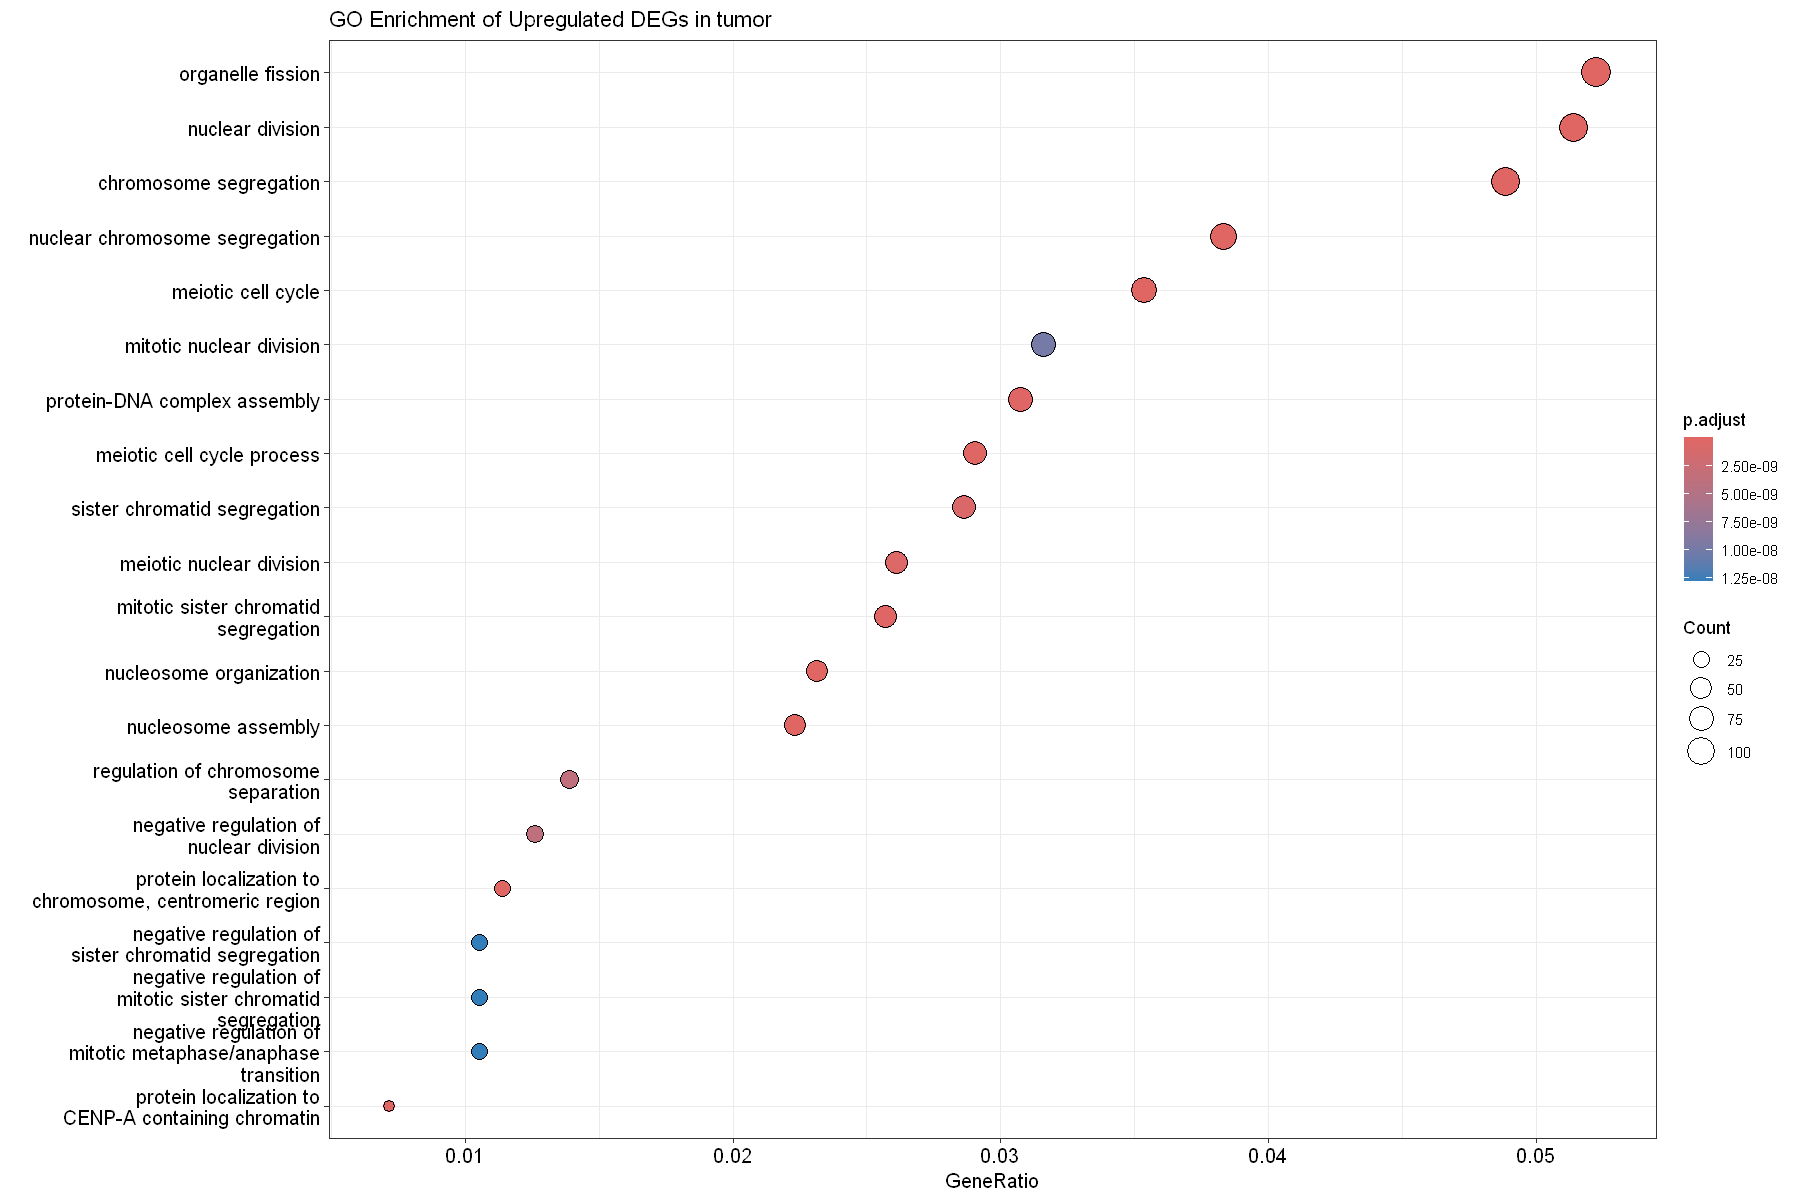

In [63]:
# Set plot dimensions
options(repr.plot.width = 15, repr.plot.height = 10)

# Dotplot
dotplot(ego, showCategory=20) + ggtitle("GO Enrichment of Upregulated DEGs in tumor")

Warning message in cnetplot.enrichResult(x, ...):
"Use 'color.params = list(foldChange = your_value)' instead of 'foldChange'.
 The foldChange parameter will be removed in the next version."
Scale for size is already present.
Adding another scale for size, which will replace the existing scale.
Warning message:
"ggrepel: 155 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


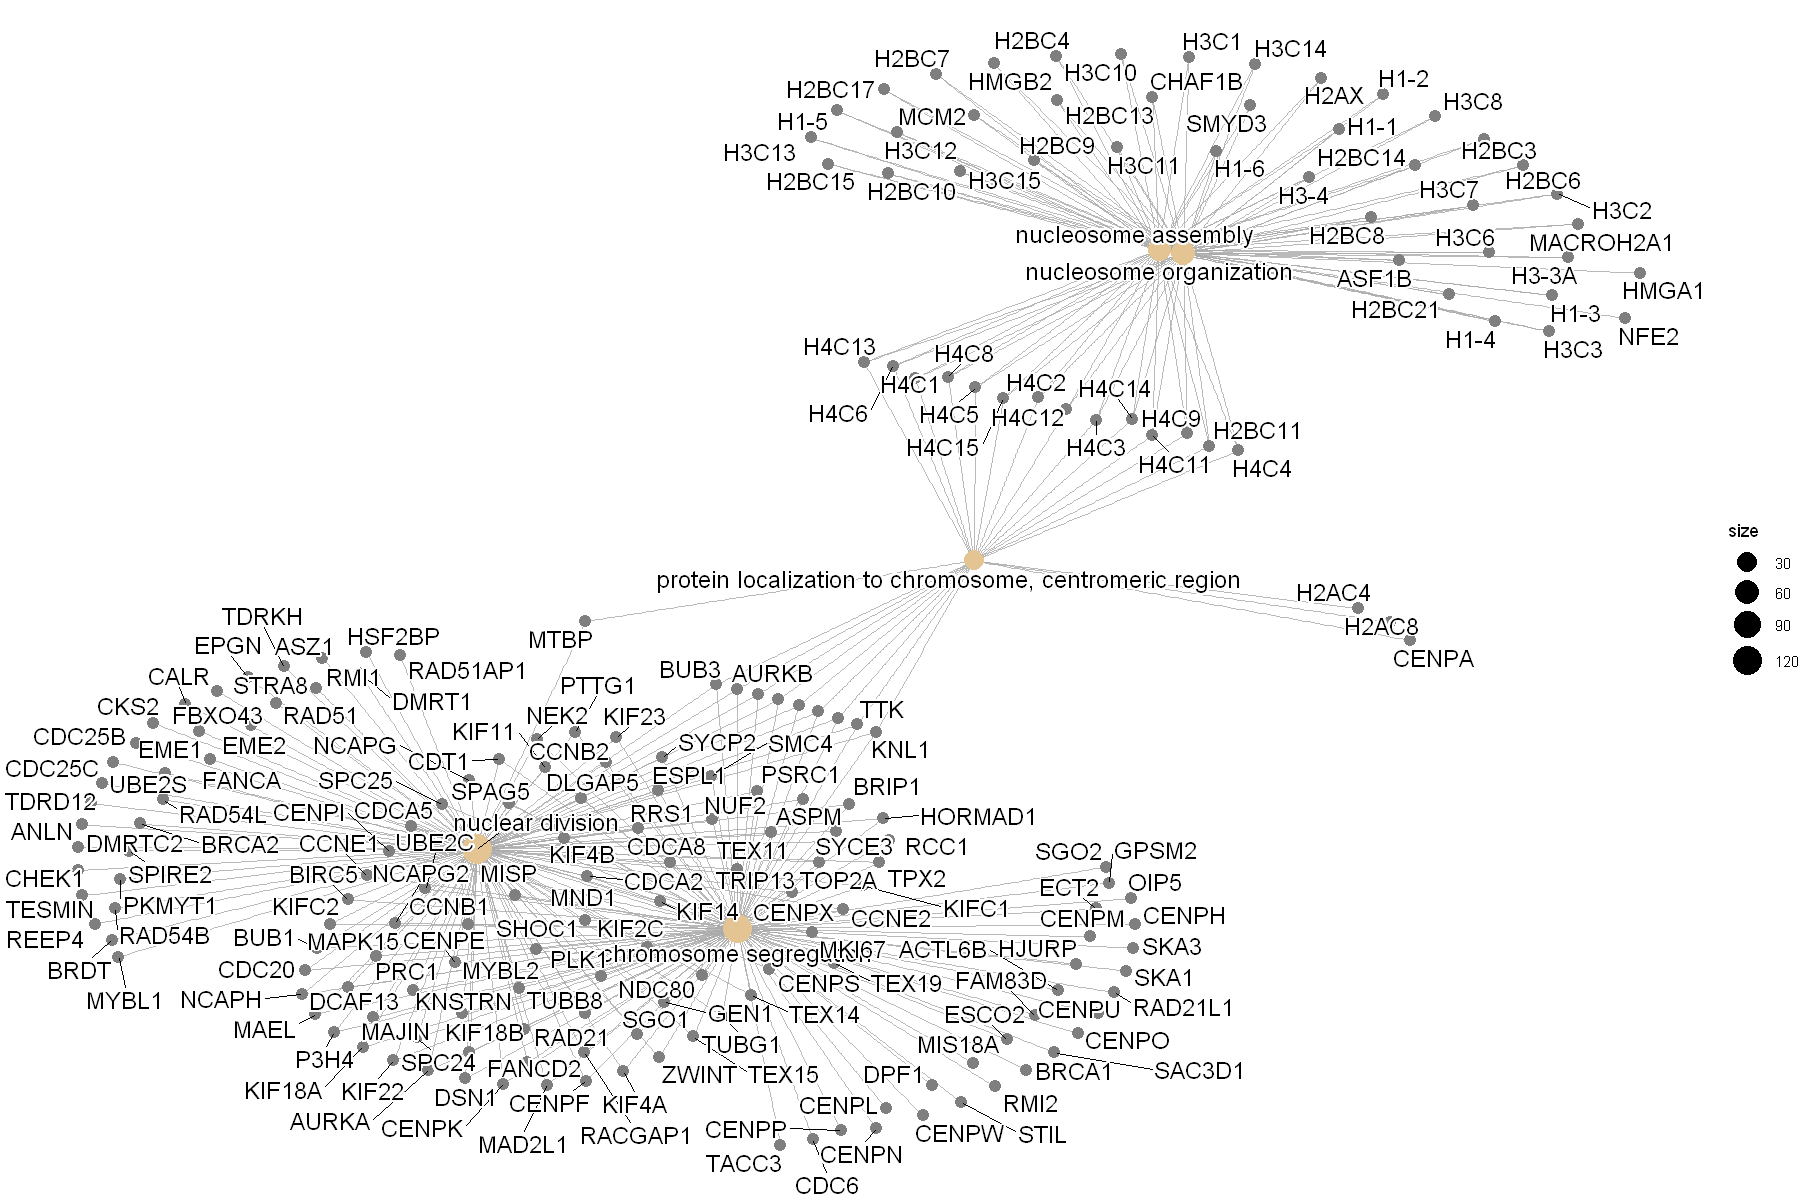

In [64]:
# Get vector of log2 fold changes
up_foldchange <- deg.up$log2FoldChange

# Cnetplot
cnetplot(ego, 
         showCategory = 5, 
         foldChange=up_foldchange)

In [65]:
write.table(ego ,"results_GO_Upregulated_RNAseq.tsv", sep="\t", quote = F, col.names = T, row.names = F)

In [66]:
# Map SYMBOL to ENTREZID
deg.up.entrez <- mapIds(org.Hs.eg.db,
                       keys=deg.up$gene_name , #Column containing Ensembl gene ids
                       column="ENTREZID",
                       keytype="SYMBOL",
                       multiVals="first")

deg.up$entrez_id <- deg.up.entrez

# Remove NAs
deg.up <- deg.up %>% drop_na(entrez_id)

head(deg.up)

'select()' returned 1:1 mapping between keys and columns



,gene_id,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene_name,gene_type,entrez_id
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,ENSG00000099953.10,24128.713,6.209371,0.1444367,0.000000e+00,0.000000e+00,MMP11,protein_coding,4320
2,ENSG00000123500.10,8508.502,7.105913,0.1562923,0.000000e+00,0.000000e+00,COL10A1,protein_coding,1300
3,ENSG00000117650.13,1467.549,4.157178,0.1121924,9.186478e-303,8.580538e-299,NEK2,protein_coding,4751
4,ENSG00000060718.22,11993.748,6.149808,0.1778572,1.898304e-265,9.850513e-262,COL11A1,protein_coding,1301
5,ENSG00000090889.12,1539.004,3.739803,0.1121651,1.069976e-245,4.997002e-242,KIF4A,protein_coding,24137
6,ENSG00000127564.17,922.351,3.784278,0.1146965,1.043166e-240,4.059830e-237,PKMYT1,protein_coding,9088


In [67]:
# KEGG enrichment analysis with entrez IDs
ekegg <- enrichKEGG(gene = deg.up.entrez,
                    organism = 'hsa',
                    pvalueCutoff  = 0.05
)

Reading KEGG annotation online: "https://rest.kegg.jp/link/hsa/pathway"...

Reading KEGG annotation online: "https://rest.kegg.jp/list/pathway/hsa"...



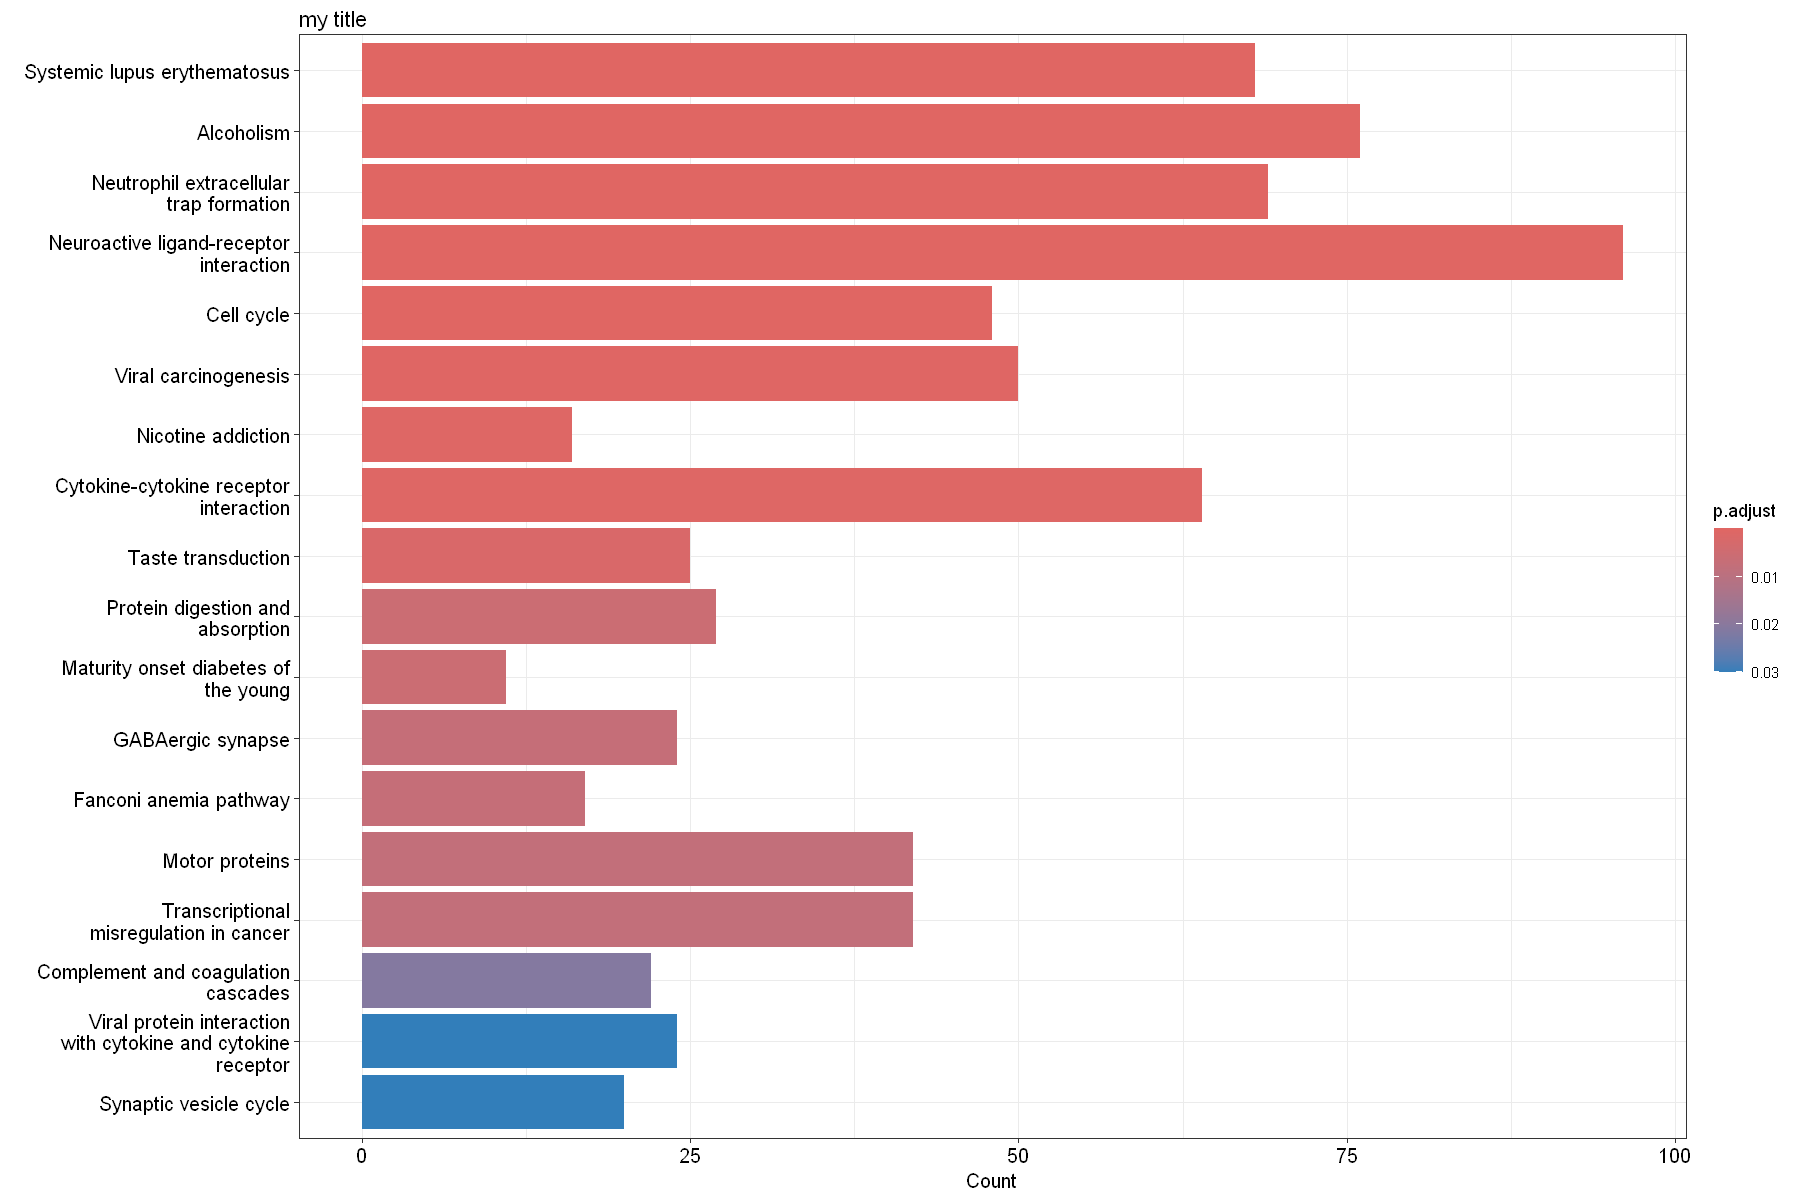

In [69]:
# Set plot dimensions
options(repr.plot.width = 15, repr.plot.height = 10)

# Barplot
barplot(ekegg, showCategory=20)+ggtitle("my title")

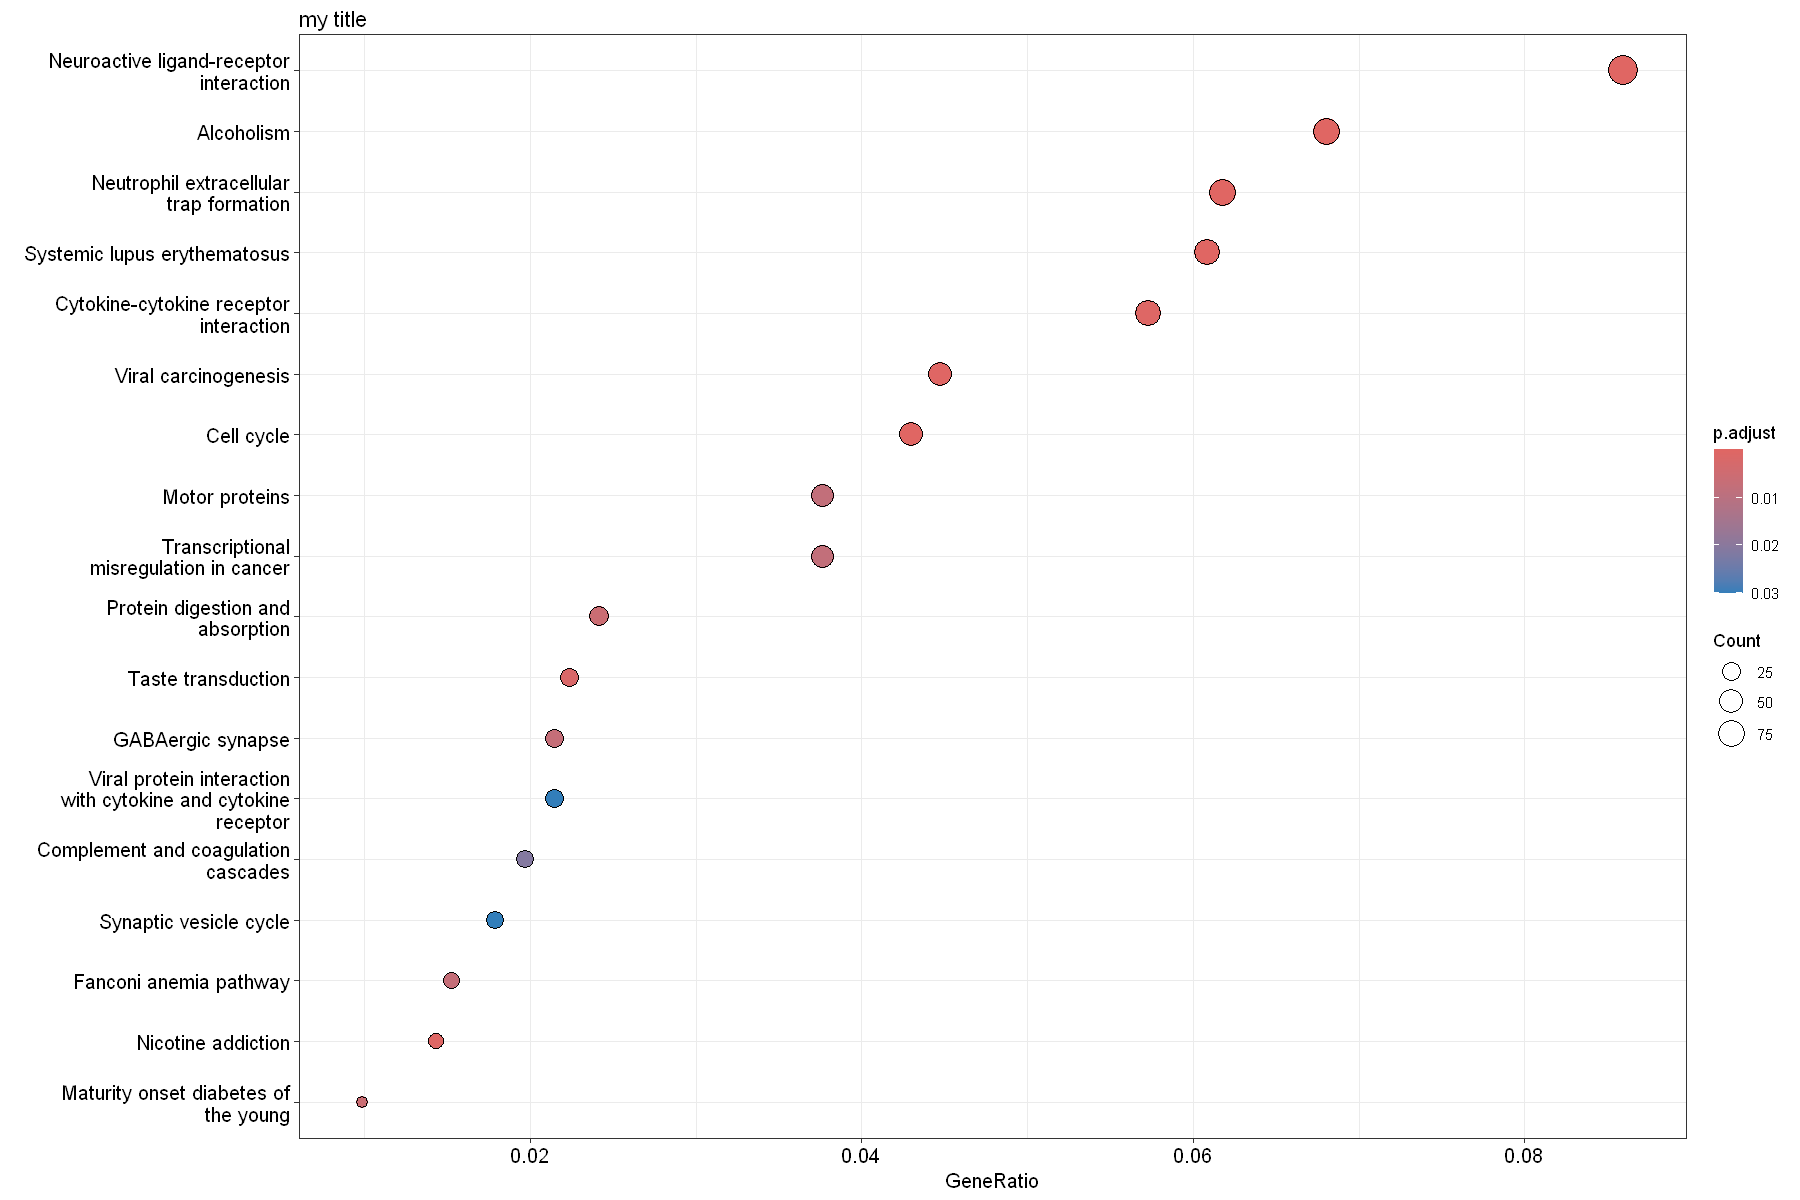

In [70]:
# Set plot dimensions
options(repr.plot.width = 15, repr.plot.height = 10)

# Dotplot
dotplot(ekegg, showCategory=20) + ggtitle("my title")

In [71]:
# Look for significant pathways
ekegg@result %>% filter(p.adjust < 0.05)

,category,subcategory,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
hsa05322,Human Diseases,Immune disease,hsa05322,Systemic lupus erythematosus,68/1117,137/8673,8.085500e-26,2.660130e-23,2.425650e-23,9555/8357/8329/8348/3017/8360/8344/3014/3015/8367/8356/8345/8358/85236/8343/8294/8347/8338/941/3020/8370/6628/8970/440689/2209/8349/8365/8331/8340/8352/8332/8362/8355/8363/8334/8339/8342/8341/8364/8336/8969/85235/8968/8337/317772/8335/8366/2214/653604/8353/8346/8354/3018/8359/723790/3012/8350/720/721/126961/554313/3013/3458/333932/8361/3118/8368/8290,68
hsa05034,Human Diseases,Substance dependence,hsa05034,Alcoholism,76/1117,188/8673,9.918552e-22,1.631602e-19,1.487783e-19,9555/8357/8329/8348/3017/8360/8344/3014/3015/51764/8367/8356/8345/8358/90993/85236/8343/8294/8347/8338/3020/8370/8970/440689/5499/148327/2906/8349/8365/8331/8340/8352/8332/8362/8355/8363/8334/8339/8342/55315/8341/8364/8336/8969/2786/85235/8968/8337/317772/8335/8366/653604/8353/8346/8354/3018/8359/2792/723790/3012/2785/2905/8350/6570/126961/554313/51806/7054/3013/2902/333932/94235/8361/84699/8368/8290,76
hsa04613,Organismal Systems,Immune system,hsa04613,Neutrophil extracellular trap formation,69/1117,191/8673,9.881822e-17,1.083706e-14,9.881822e-15,9555/8357/8329/8348/3017/8360/8344/3014/3015/8367/8356/820/8345/8358/85236/8343/8294/8347/8338/3020/8370/8970/440689/2209/8349/8365/8331/8340/8352/8332/8362/8355/8363/8334/8339/8342/8341/8364/8336/8969/85235/8968/8337/317772/8335/8366/2214/653604/8353/8346/8354/3018/8359/64581/723790/3012/8350/126961/554313/3013/333932/8361/566/1379/8368/5582/2266/8290/2244,69
hsa04080,Environmental Information Processing,Signaling molecules and interaction,hsa04080,Neuroactive ligand-receptor interaction,96/1117,367/8673,1.851529e-12,1.522883e-10,1.388647e-10,2563/2914/8973/2918/6343/3352/1081/7425/79924/84634/2906/55584/283869/1907/7200/27346/55879/9170/10874/4985/3814/2151/2556/2558/4923/79957/6752/9568/5031/51289/5697/7349/51052/5618/2891/1815/3354/51083/887/6019/1134/2905/2831/27334/59350/2900/4161/10911/2554/2147/57152/8811/6870/1137/183/2902/886/1138/5026/3350/170589/6755/2642/4886/11255/3362/10886/2566/1143/399968/2691/1269/797/1146/2925/22953/796/200959/553/2693/3358/1144/2695/2915/5340/3827/8484/3062/2741/1142/114131/4986/84539/4544/1443/4158,96
hsa04110,Cellular Processes,Cell growth and death,hsa04110,Cell cycle,48/1117,157/8673,3.631015e-09,2.389208e-07,2.178609e-07,9088/995/983/699/5347/9232/891/10403/151648/991/57082/701/113130/9133/9212/890/9700/157570/8318/7272/1869/9319/4085/990/23594/1870/81620/5111/9134/4998/4173/1111/993/8317/898/9184/10926/90381/4171/1029/1875/1032/5885/27085/27127/994/595/10912,48
hsa05203,Human Diseases,Cancer: overview,hsa05203,Viral carcinogenesis,50/1117,204/8673,3.501961e-06,1.920242e-04,1.750980e-04,983/991/890/8348/3017/8360/8344/8367/9134/8345/3665/1111/90993/85236/8343/1237/8294/8347/7186/8370/898/8970/440689/148327/9261/581/8349/8365/8340/8362/3249/5366/1029/8363/8339/8342/8341/8364/1233/8366/8346/3018/8359/595/554313/8361/245972/84699/8368/11317,50
hsa05033,Human Diseases,Substance dependence,hsa05033,Nicotine addiction,16/1117,40/8673,1.561494e-05,6.726937e-04,6.133985e-04,2563/8973/2906/55879/2556/2558/774/2891/2905/2554/1137/2902/246213/2566/200959/140679,16
hsa04060,Environmental Information Processing,Signaling molecules and interaction,hsa04060,Cytokine-cytokine receptor interaction,64/1117,297/8673,1.635729e-05,6.726937e-04,6.133985e-04,3624/353500/6356/6373/3627/50615/3604/8784/1237/7292/658/84957/29949/4283/285613/268/9518/50604/2056/3581/3589/6354/11009/6364/1233/246778/282617/7852/282616/4049/3606/3593/3623/4050/7066/5618/282618/2833/59067/3456/5008/1236/7293/284340/27189/6361/10673/26525/643/656/1441/6370/83729/3561/3458/3560/6346/10563/6363/3595/56300/56832/3578/1443,64
hsa04742,Organismal Systems,Sensory system,hsa04742,Taste transduction,25/1117,86/8673,5.240513e-05,1.915699e-03,1.7

In [72]:
gene_list <- deg.up %>% 
             dplyr::select(entrez_id, log2FoldChange) %>%
             deframe()

head(gene_list)

4320     1300     4751     1301    24137     9088 
6.209371 7.105913 4.157178 6.149808 3.739803 3.784278

In [75]:

hsa05322 <- pathview(gene.data  = gene_list,
                     pathway.id = "hsa05322",
                     species    = "hsa")

Info: Downloading xml files for hsa05322, 1/1 pathways..



Info: Downloading png files for hsa05322, 1/1 pathways..

'select()' returned 1:1 mapping between keys and columns

Info: Working in directory d:/OneDrive - National University of Singapore/NUS/2024-Master/5003 Statistics/jupyterlab/Project

Info: Writing image file hsa05322.pathview.png



In [76]:
write.table(ekegg@result ,"results_KEGG_Upregulated_RNAseq.tsv", sep="\t", quote = F, col.names = T, row.names = F)

In [77]:
library(msigdbr)

# Load gene sets
hs_hallmark_sets <- msigdbr(
  species = "Homo sapiens",
  category = "H"
)

head(hs_hallmark_sets)

gs_cat,gs_subcat,gs_name,gene_symbol,entrez_gene,ensembl_gene,human_gene_symbol,human_entrez_gene,human_ensembl_gene,gs_id,gs_pmid,gs_geoid,gs_exact_source,gs_url,gs_description
<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
H,,HALLMARK_ADIPOGENESIS,ABCA1,19,ENSG00000165029,ABCA1,19,ENSG00000165029,M5905,26771021,,,,Genes up-regulated during adipocyte differentiation (adipogenesis).
H,,HALLMARK_ADIPOGENESIS,ABCB8,11194,ENSG00000197150,ABCB8,11194,ENSG00000197150,M5905,26771021,,,,Genes up-regulated during adipocyte differentiation (adipogenesis).
H,,HALLMARK_ADIPOGENESIS,ACAA2,10449,ENSG00000167315,ACAA2,10449,ENSG00000167315,M5905,26771021,,,,Genes up-regulated during adipocyte differentiation (adipogenesis).
H,,HALLMARK_ADIPOGENESIS,ACADL,33,ENSG00000115361,ACADL,33,ENSG00000115361,M5905,26771021,,,,Genes up-regulated during adipocyte differentiation (adipogenesis).
H,,HALLMARK_ADIPOGENESIS,ACADM,34,ENSG00000117054,ACADM,34,ENSG00000117054,M5905,26771021,,,,Genes up-regulated during adipocyte differentiation (adipogenesis).
H,,HALLMARK_ADIPOGENESIS,ACADS,35,ENSG00000122971,ACADS,35,ENSG00000122971,M5905,26771021,,,,Genes up-regulated during adipocyte differentiation (adipogenesis).


In [78]:
# Show unique gene sets
hs_hallmark_sets %>% 
dplyr::select(gs_name, gs_description) %>%
distinct()

gs_name,gs_description
<chr>,<chr>
HALLMARK_ADIPOGENESIS,Genes up-regulated during adipocyte differentiation (adipogenesis).
HALLMARK_ALLOGRAFT_REJECTION,Genes up-regulated during transplant rejection.
HALLMARK_ANDROGEN_RESPONSE,Genes defining response to androgens.
HALLMARK_ANGIOGENESIS,Genes up-regulated during formation of blood vessels (angiogenesis).
HALLMARK_APICAL_JUNCTION,Genes encoding components of apical junction complex.
HALLMARK_APICAL_SURFACE,"Genes encoding proteins over-represented on the apical surface of epithelial cells, e.g., important for cell polarity (apical area)."
HALLMARK_APOPTOSIS,Genes mediating programmed cell death (apoptosis) by activation of caspases.
HALLMARK_BILE_ACID_METABOLISM,Genes involve in metabolism of bile acids and salts.
HALLMARK_CHOLESTEROL_HOMEOSTASIS,Genes involved in cholesterol homeostasis.


In [79]:
lfc_vector <- deg.df %>% 
              dplyr::select(gene_name, log2FoldChange) %>%
              arrange(-log2FoldChange) %>%
              deframe()

head(lfc_vector)

CST4     MUC2     CST5      CGA   MAGEA3  COL10A1 
8.326706 7.934648 7.573870 7.336113 7.154857 7.105913

In [80]:
# Set the seed so our results are reproducible:
set.seed(1000)

gsea_results <- GSEA(
  geneList = lfc_vector, # Ordered ranked gene list
  minGSSize = 25, # Minimum gene set size
  maxGSSize = 500, # Maximum gene set set
  pvalueCutoff = 0.05, # p-value cutoff
  eps = 0, # Boundary for calculating the p value
  seed = TRUE, # Set seed to make results reproducible
  pAdjustMethod = "BH", # Benjamini-Hochberg correction
  TERM2GENE = dplyr::select(
    hs_hallmark_sets,
    gs_name,
    human_gene_symbol
  )
)

preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...



In [81]:
gsea.df <- data.frame(gsea_results@result)

head(gsea.df)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,86,0.5702579,3.248366,3.925313e-16,1.256100e-14,7.437435e-15,1025,"tags=65%, list=22%, signal=52%",NEK2/UBE2C/KIF4A/MYBL2/TPX2/TOP2A/BIRC5/PBK/CDC20/TROAP/EXO1/PLK1/CENPF/BUB1/KIF2C/AURKB/CENPA/NDC80/PTTG1/CDK1/MKI67/AURKA/HMMR/CCNB2/CDC6/CCNA2/CDKN3/KNL1/TTK/CDC45/ESPL1/CENPE/POLQ/CKS2/KIF23/RAD54L/SLC7A5/KIF15/KIF11/ORC6/E2F1/E2F2/LMNB1/HMGB3/HOXC10/UBE2S/EZH2/SQLE/TACC3/MAD2L1/CDC25A/JPT1/KPNA2/STIL/H2BC12/GINS2
HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,HALLMARK_E2F_TARGETS,90,0.5327806,3.066844,7.254871e-14,1.160779e-12,6.873036e-13,1374,"tags=69%, list=29%, signal=50%",KIF4A/MYBL2/MELK/TOP2A/KIF18B/BIRC5/CDC20/RRM2/PLK1/DLGAP5/DEPDC1/KIF2C/AURKB/UBE2T/PTTG1/CDK1/CDCA3/SPC24/MKI67/AURKA/HMMR/ASF1B/TK1/CDCA8/CCNB2/BUB1B/CDKN3/SPC25/SPAG5/CENPM/ESPL1/CCNE1/CENPE/CKS2/E2F8/TRIP13/ORC6/GINS1/LMNB1/HMGB3/UBE2S/CDKN2A/EZH2/RAD51AP1/DIAPH3/TACC3/MAD2L1/CDC25A/JPT1/KPNA2/CIT/ATAD2/GINS4/RACGAP1/NME1/CHEK1/H2AX/HELLS/PLK4/MCM4/STMN1/RNASEH2A
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,56,-0.5891708,-3.566836,2.403000e-13,2.563200e-12,1.517684e-12,1191,"tags=73%, list=26%, signal=55%",ACADS/CDKN2C/STAT5A/ELMOD3/LAMA4/ARL4A/GBE1/SSPN/ME1/SPARCL1/CD302/RETSAT/SNCG/ITSN1/CAVIN1/PFKFB3/ANGPTL4/CAT/MYLK/MGLL/ALDH2/LIFR/FZD4/ENPP2/ANGPT1/MRAP/PPARG/ACADL/SORBS1/ITGA7/GPX3/CAVIN2/ITIH5/CD36/GPAM/LIPE/LPL/FABP4/CIDEA/ADIPOQ/LEP
HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,HALLMARK_MYOGENESIS,84,-0.4070951,-2.722298,1.778070e-08,1.422456e-07,8.422435e-08,1202,"tags=55%, list=26%, signal=41%",ABLIM1/SCHIP1/NCAM1/MYL2/APOD/SSPN/PC/SGCA/LDB3/SCD/CDH13/TNNT1/LAMA2/BIN1/TPM2/CAV3/PTGIS/NOS1/CKMT2/MYLK/MRAS/SOD3/IGF1/COX7A1/HSPB2/GSN/FGF2/SGCG/MYOM2/DES/ACSL1/MYH1/DMD/CRYAB/CFD/TNNT3/MYH11/CASQ2/PYGM/FXYD1/SORBS1/ITGA7/GPX3/CD36/MYOM1/FHL1
HALLMARK_FATTY_ACID_METABOLISM,HALLMARK_FATTY_ACID_METABOLISM,HALLMARK_FATTY_ACID_METABOLISM,42,-0.4637976,-2.589111,2.819190e-06,1.804281e-05,1.068324e-05,388,"tags=33%, list=8%, signal=31%",INMT/ALDH1A1/ACSL1/MAOA/ADH1C/ACADL/CYP1A1/AOC3/G0S2/CD36/CIDEA/AQP7/GPD1/CA4
HALLMARK_XENOBIOTIC_METABOLISM,HALLMARK_XENOBIOTIC_METABOLISM,HALLMARK_XENOBIOTIC_METABOLISM,53,-0.4167826,-2.492400,1.055743e-05,5.630630e-05,3.333925e-05,532,"tags=38%, list=11%, signal=34%",NDRG2/ALDH2/AKR1C3/AOX1/IGF1/CYP1A2/F10/HSD11B1/IGFBP1/AKR1C2/MAOA/ATOH8/ADH1C/PDK4/CYP1A1/CDO1/CES1/CD36/ABCD2/RBP4


In [82]:
# Sort by descending NES
gsea.df %>% 
arrange(-NES) %>%
head(1)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,HALLMARK_G2M_CHECKPOINT,86,0.5702579,3.248366,3.925313e-16,1.2561e-14,7.437435e-15,1025,"tags=65%, list=22%, signal=52%",NEK2/UBE2C/KIF4A/MYBL2/TPX2/TOP2A/BIRC5/PBK/CDC20/TROAP/EXO1/PLK1/CENPF/BUB1/KIF2C/AURKB/CENPA/NDC80/PTTG1/CDK1/MKI67/AURKA/HMMR/CCNB2/CDC6/CCNA2/CDKN3/KNL1/TTK/CDC45/ESPL1/CENPE/POLQ/CKS2/KIF23/RAD54L/SLC7A5/KIF15/KIF11/ORC6/E2F1/E2F2/LMNB1/HMGB3/HOXC10/UBE2S/EZH2/SQLE/TACC3/MAD2L1/CDC25A/JPT1/KPNA2/STIL/H2BC12/GINS2


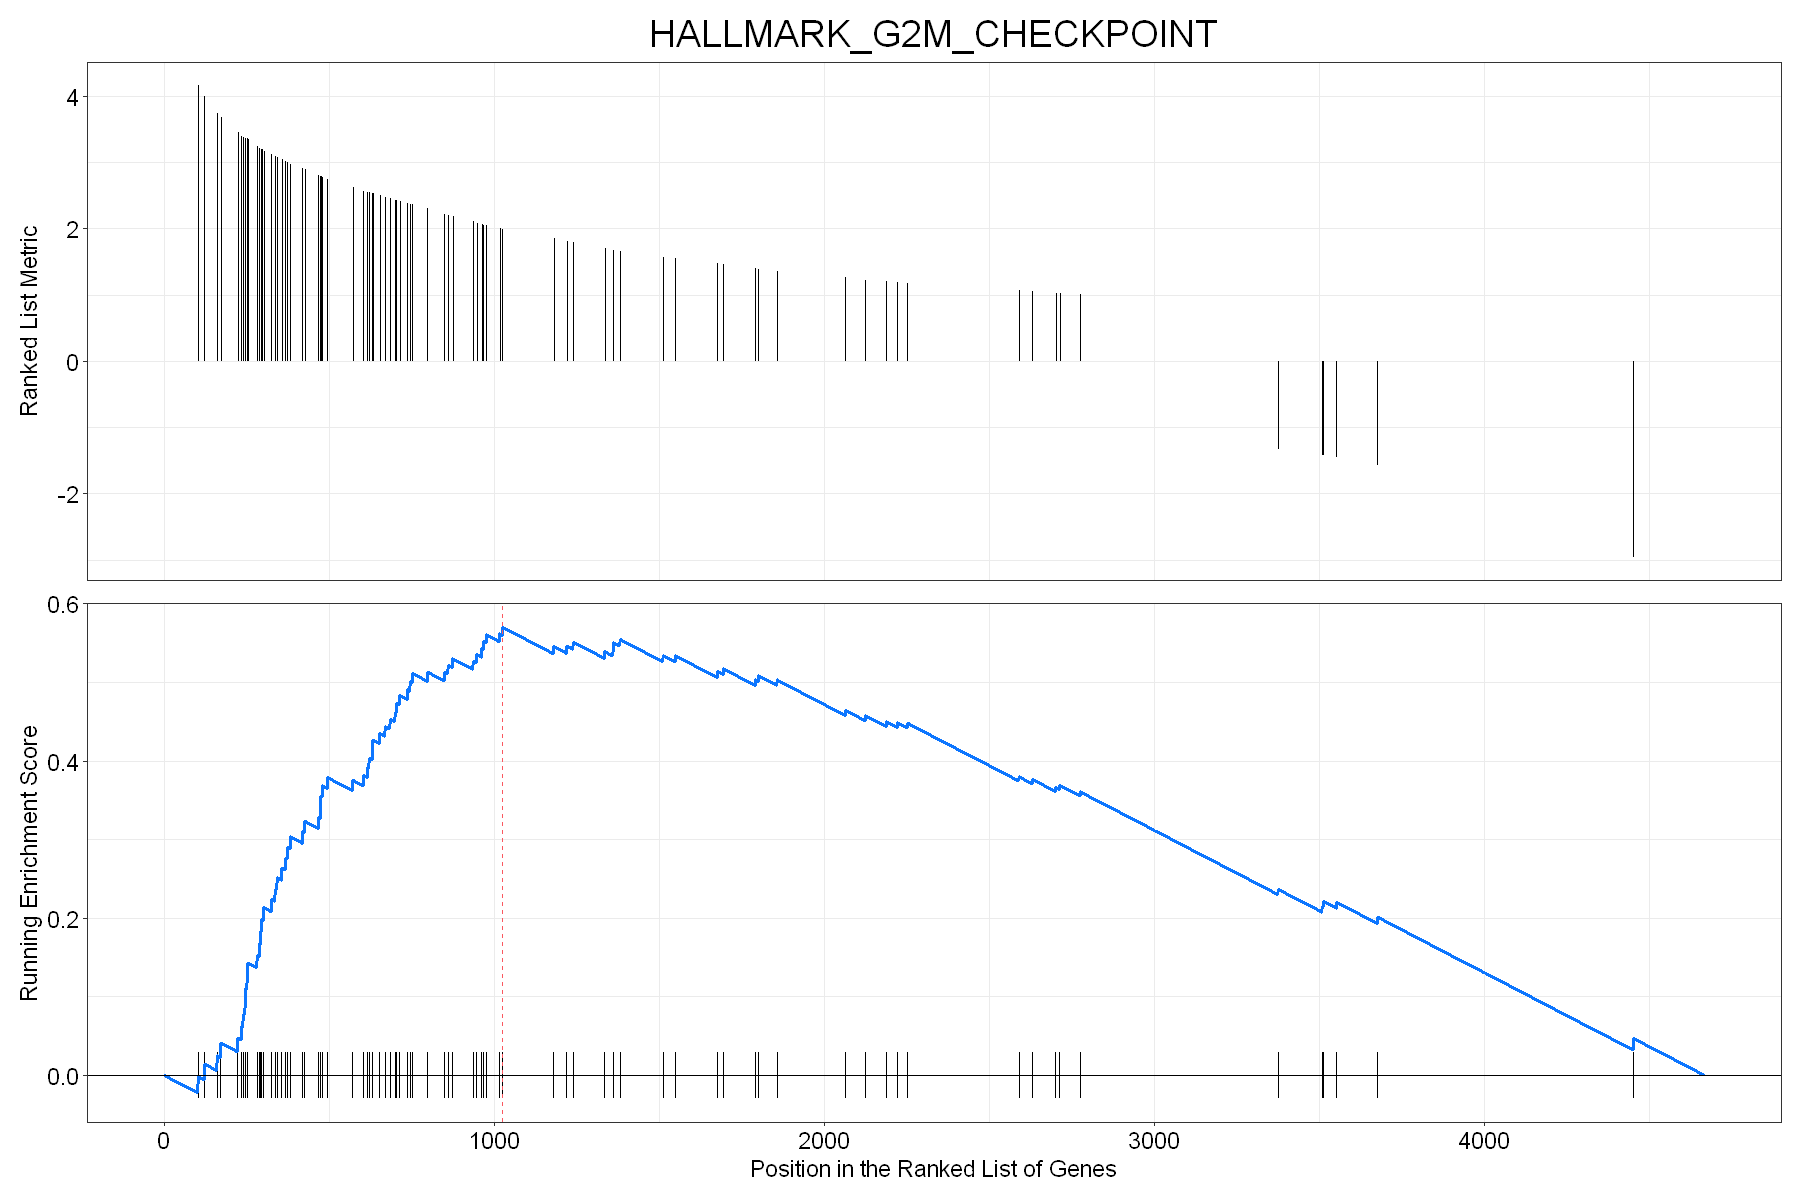

In [83]:
gseaplot(
  gsea_results,
  geneSetID = "HALLMARK_G2M_CHECKPOINT",
  title = "HALLMARK_G2M_CHECKPOINT",
  color.line = "#0d76ff"
)

In [84]:
gsea.df %>% 
arrange(NES) %>%
head(1)

,ID,Description,setSize,enrichmentScore,NES,pvalue,p.adjust,qvalue,rank,leading_edge,core_enrichment
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,HALLMARK_ADIPOGENESIS,56,-0.5891708,-3.566836,2.403e-13,2.5632e-12,1.517684e-12,1191,"tags=73%, list=26%, signal=55%",ACADS/CDKN2C/STAT5A/ELMOD3/LAMA4/ARL4A/GBE1/SSPN/ME1/SPARCL1/CD302/RETSAT/SNCG/ITSN1/CAVIN1/PFKFB3/ANGPTL4/CAT/MYLK/MGLL/ALDH2/LIFR/FZD4/ENPP2/ANGPT1/MRAP/PPARG/ACADL/SORBS1/ITGA7/GPX3/CAVIN2/ITIH5/CD36/GPAM/LIPE/LPL/FABP4/CIDEA/ADIPOQ/LEP


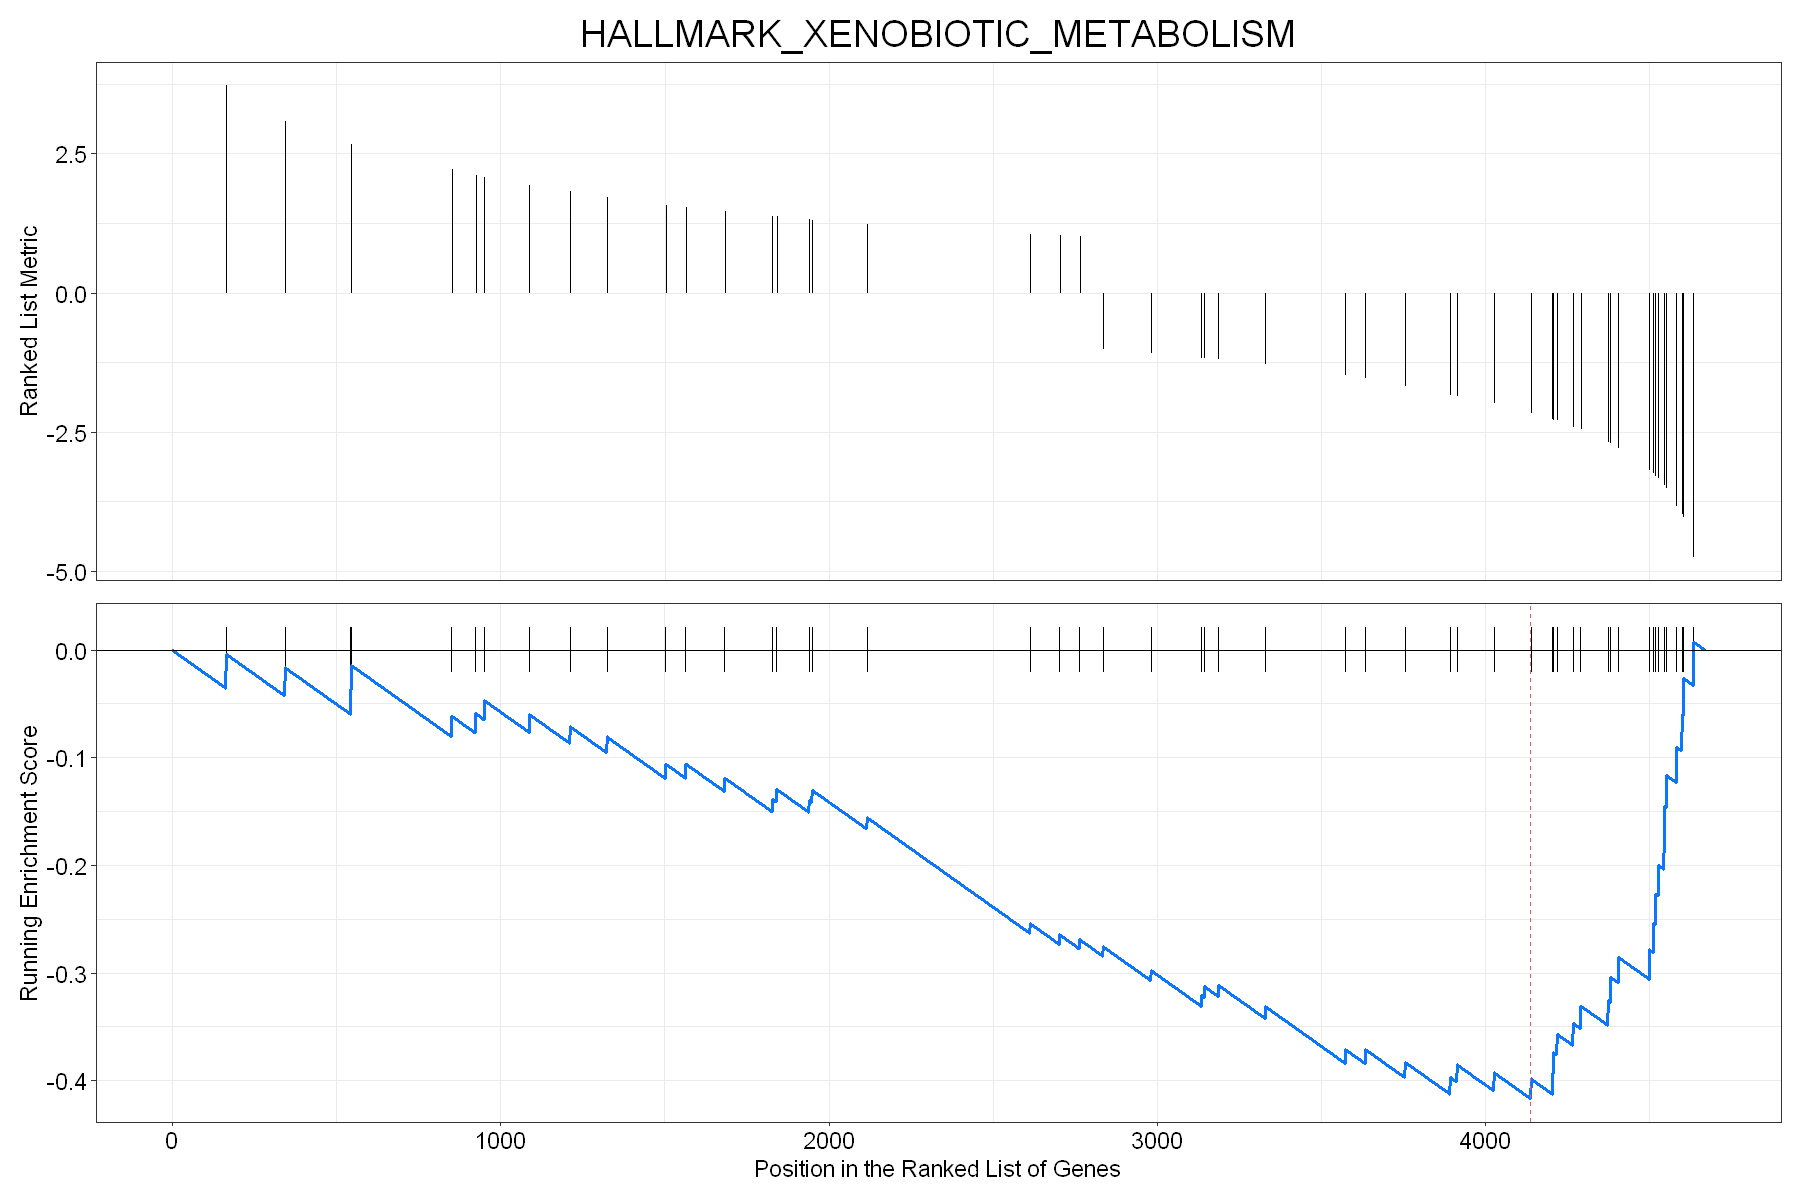

In [85]:
gseaplot(
  gsea_results,
  geneSetID = "HALLMARK_XENOBIOTIC_METABOLISM",
  title = "HALLMARK_XENOBIOTIC_METABOLISM",
  color.line = "#0d76ff"
)

In [86]:
write.table(gsea.df,"results_GSEA_hallmark_RNAseq.tsv", sep="\t", quote = F, col.names = T, row.names = F)

In [5]:
library(tidyverse)
load("exp.rda")
clin.data <- data.frame(exp@colData)
head(clin.data)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
载入需要的程辑包：S4Vectors

载入需要的程辑包：stats4

载入需要的程辑包：BiocGenerics


载入程辑包：'BiocGenerics'


The following objects are masked from 'package:lubridate':

    intersect, setdiff, union


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cb

,barcode,patient,sample,shortLetterCode,definition,sample_submitter_id,sample_type_id,tumor_descriptor,sample_id,sample_type,⋯,paper_tobacco_smoking_history,paper_CNV.Clusters,paper_Mutation.Clusters,paper_DNA.Methylation.Clusters,paper_mRNA.Clusters,paper_miRNA.Clusters,paper_lncRNA.Clusters,paper_Protein.Clusters,paper_PARADIGM.Clusters,paper_Pan.Gyn.Clusters
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
TCGA-E9-A1RH-01A-21R-A169-07,TCGA-E9-A1RH-01A-21R-A169-07,TCGA-E9-A1RH,TCGA-E9-A1RH-01A,TP,Primary solid Tumor,TCGA-E9-A1RH-01A,01,Primary,6b1bb382-0103-4207-a0e8-871aa6aae81c,Primary Tumor,⋯,NA,C4,C1,C2,C2,C3,C1,C2,C4,C3
TCGA-C8-A26W-01A-11R-A16F-07,TCGA-C8-A26W-01A-11R-A16F-07,TCGA-C8-A26W,TCGA-C8-A26W-01A,TP,Primary solid Tumor,TCGA-C8-A26W-01A,01,Primary,317b72a8-0332-4db8-b9d1-9a26d9907a24,Primary Tumor,⋯,NA,C6,C4,C1,C2,C2,C2,C2,C4,C4
TCGA-E9-A1RH-11A-34R-A169-07,TCGA-E9-A1RH-11A-34R-A169-07,TCGA-E9-A1RH,TCGA-E9-A1RH-11A,NT,Solid Tissue Normal,TCGA-E9-A1RH-11A,11,Not Applicable,a081f522-7603-4134-90c0-89e70fa43688,Solid Tissue Normal,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-AO-A0JJ,TCGA-AO-A0JJ-01A,TP,Primary solid Tumor,TCGA-AO-A0JJ-01A,01,Primary,008dafdd-a3d1-4801-8c0a-8714e2b58e48,Primary Tumor,⋯,NA,C1,C2,C1,C1,C3,C2,C2,C6,C1
TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A0HO,TCGA-BH-A0HO-01A,TP,Primary solid Tumor,TCGA-BH-A0HO-01A,01,Primary,02c8bf84-4816-49a9-b5d1-0edebb8627c7,Primary Tumor,⋯,NA,C1,C4,C1,C1,C3,NA,NA,C5,NA
TCGA-BH-A18F-01A-11R-A12D-07,TCGA-BH-A18F-01A-11R-A12D-07,TCGA-BH-A18F,TCGA-BH-A18F-01A,TP,Primary solid Tumor,TCGA-BH-A18F-01A,01,Primary,adbf4056-e7d4-4282-8771-f2d6029386ab,Primary Tumor,⋯,NA,C1,C4,C1,C1,C3,C2,C1,C6,C1


In [6]:
# Select columns
surv.data <- clin.data %>% 
             dplyr::select(barcode,  
                           sample_type, 
                           gender,
                           race,
                           paper_age_at_initial_pathologic_diagnosis, 
                           paper_pathologic_stage, 
                           vital_status, 
                           days_to_last_follow_up, 
                           days_to_death)

head(surv.data)

,barcode,sample_type,gender,race,paper_age_at_initial_pathologic_diagnosis,paper_pathologic_stage,vital_status,days_to_last_follow_up,days_to_death
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>
TCGA-E9-A1RH-01A-21R-A169-07,TCGA-E9-A1RH-01A-21R-A169-07,Primary Tumor,female,white,63,Stage_II,Alive,1417,NA
TCGA-C8-A26W-01A-11R-A16F-07,TCGA-C8-A26W-01A-11R-A16F-07,Primary Tumor,female,asian,58,Stage_II,Alive,381,NA
TCGA-E9-A1RH-11A-34R-A169-07,TCGA-E9-A1RH-11A-34R-A169-07,Solid Tissue Normal,female,white,NA,NA,Alive,1417,NA
TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-AO-A0JJ-01A-11R-A056-07,Primary Tumor,female,white,54,Stage_II,Alive,1887,NA
TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A0HO-01A-11R-A034-07,Primary Tumor,female,white,48,Stage_II,Alive,76,NA
TCGA-BH-A18F-01A-11R-A12D-07,TCGA-BH-A18F-01A-11R-A12D-07,Primary Tumor,female,white,50,Stage_II,Alive,1001,NA


In [7]:
# Code for time and status
surv.data <- surv.data %>%      
             mutate(OS.days = case_when(vital_status == "Alive" ~ days_to_last_follow_up,
                                        vital_status == "Dead" ~ days_to_death)) %>%
             mutate(Status = recode(vital_status, "Alive" = 0, "Dead" = 1)) %>% 
             mutate(Status = as.numeric(Status)) %>% 
             mutate(OS.month = round(as.numeric(OS.days)/30, 3))

head(surv.data)

,barcode,sample_type,gender,race,paper_age_at_initial_pathologic_diagnosis,paper_pathologic_stage,vital_status,days_to_last_follow_up,days_to_death,OS.days,Status,OS.month
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
TCGA-E9-A1RH-01A-21R-A169-07,TCGA-E9-A1RH-01A-21R-A169-07,Primary Tumor,female,white,63,Stage_II,Alive,1417,NA,1417,0,47.233
TCGA-C8-A26W-01A-11R-A16F-07,TCGA-C8-A26W-01A-11R-A16F-07,Primary Tumor,female,asian,58,Stage_II,Alive,381,NA,381,0,12.700
TCGA-E9-A1RH-11A-34R-A169-07,TCGA-E9-A1RH-11A-34R-A169-07,Solid Tissue Normal,female,white,NA,NA,Alive,1417,NA,1417,0,47.233
TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-AO-A0JJ-01A-11R-A056-07,Primary Tumor,female,white,54,Stage_II,Alive,1887,NA,1887,0,62.900
TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A0HO-01A-11R-A034-07,Primary Tumor,female,white,48,Stage_II,Alive,76,NA,76,0,2.533
TCGA-BH-A18F-01A-11R-A12D-07,TCGA-BH-A18F-01A-11R-A12D-07,Primary Tumor,female,white,50,Stage_II,Alive,1001,NA,1001,0,33.367


In [8]:
# Filter for tumor samples and survival data
surv.data <- surv.data %>% 
             filter(sample_type == "Primary Tumor") %>% 
             filter(Status %in% c("0", "1")) %>% 
             filter(OS.month != "NA") 
head(surv.data)

,barcode,sample_type,gender,race,paper_age_at_initial_pathologic_diagnosis,paper_pathologic_stage,vital_status,days_to_last_follow_up,days_to_death,OS.days,Status,OS.month
,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<dbl>,<dbl>
TCGA-E9-A1RH-01A-21R-A169-07,TCGA-E9-A1RH-01A-21R-A169-07,Primary Tumor,female,white,63,Stage_II,Alive,1417,NA,1417,0,47.233
TCGA-C8-A26W-01A-11R-A16F-07,TCGA-C8-A26W-01A-11R-A16F-07,Primary Tumor,female,asian,58,Stage_II,Alive,381,NA,381,0,12.700
TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-AO-A0JJ-01A-11R-A056-07,Primary Tumor,female,white,54,Stage_II,Alive,1887,NA,1887,0,62.900
TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A0HO-01A-11R-A034-07,Primary Tumor,female,white,48,Stage_II,Alive,76,NA,76,0,2.533
TCGA-BH-A18F-01A-11R-A12D-07,TCGA-BH-A18F-01A-11R-A12D-07,Primary Tumor,female,white,50,Stage_II,Alive,1001,NA,1001,0,33.367
TCGA-C8-A12O-01A-11R-A115-07,TCGA-C8-A12O-01A-11R-A115-07,Primary Tumor,female,asian,50,Stage_II,Alive,385,NA,385,0,12.833


In [9]:
colnames(clin.data)

[1] "barcode"                                  
 [2] "patient"                                  
 [3] "sample"                                   
 [4] "shortLetterCode"                          
 [5] "definition"                               
 [6] "sample_submitter_id"                      
 [7] "sample_type_id"                           
 [8] "tumor_descriptor"                         
 [9] "sample_id"                                
[10] "sample_type"                              
[11] "composition"                              
[12] "days_to_collection"                       
[13] "state"                                    
[14] "initial_weight"                           
[15] "preservation_method"                      
[16] "pathology_report_uuid"                    
[17] "submitter_id"                             
[18] "oct_embedded"                             
[19] "specimen_type"                            
[20] "is_ffpe"                                  
[21] "tissue_type"                              
[22] "synchronous_malignancy"                   
[23] "ajcc_pathologic_stage"                    
[24] "days_to_diagnosis"                        
[25] "treatments"                               
[26] "last_known_disease_status"                
[27] "tissue_or_organ_of_origin"                
[28] "days_to_last_follow_up"                   
[29] "age_at_diagnosis"                         
[30] "primary_diagnosis"                        
[31] "prior_malignancy"                         
[32] "year_of_diagnosis"                        
[33] "prior_treatment"                          
[34] "ajcc_staging_system_edition"              
[35] "ajcc_pathologic_t"                        
[36] "morphology"                               
[37] "ajcc_pathologic_n"                        
[38] "ajcc_pathologic_m"                        
[39] "classification_of_tumor"                  
[40] "diagnosis_id"                             
[41] "icd_10_code"                              
[42] "site_of_resection_or_biopsy"              
[43] "tumor_grade"                              
[44] "progression_or_recurrence"                
[45] "alcohol_history"                          
[46] "exposure_id"                              
[47] "race"                                     
[48] "gender"                                   
[49] "ethnicity"                                
[50] "vital_status"                             
[51] "age_at_index"                             
[52] "days_to_birth"                            
[53] "year_of_birth"                            
[54] "demographic_id"                           
[55] "bcr_patient_barcode"                      
[56] "primary_site"                             
[57] "project_id"                               
[58] "disease_type"                             
[59] "name"                                     
[60] "releasable"                               
[61] "released"                                 
[62] "days_to_death"                            
[63] "year_of_death"                            
[64] "days_to_sample_procurement"               
[65] "paper_patient"                            
[66] "paper_Tumor.Type"                         
[67] "paper_Included_in_previous_marker_papers" 
[68] "paper_vital_status"                       
[69] "paper_days_to_birth"                      
[70] "paper_days_to_death"                      
[71] "paper_days_to_last_followup"              
[72] "paper_age_at_initial_pathologic_diagnosis"
[73] "paper_pathologic_stage"                   
[74] "paper_Tumor_Grade"                        
[75] "paper_BRCA_Pathology"                     
[76] "paper_BRCA_Subtype_PAM50"                 
[77] "paper_MSI_status"                         
[78] "paper_HPV_Status"                         
[79] "paper_tobacco_smoking_history"            
[80] "paper_CNV.Clusters"                       
[81] "paper_Mutation.Clusters"                  
[82] "paper_DNA.Methylation.Clus

In [10]:
# Change data types
surv.data <- surv.data %>% 
             mutate(Status = as.numeric(Status)) %>%
             mutate(age = paper_age_at_initial_pathologic_diagnosis) %>% 
             mutate(stage = paper_pathologic_stage) %>% 
             dplyr::select(barcode, OS.month, Status, gender, race, age, stage)

head(surv.data)

,barcode,OS.month,Status,gender,race,age,stage
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>
TCGA-E9-A1RH-01A-21R-A169-07,TCGA-E9-A1RH-01A-21R-A169-07,47.233,0,female,white,63,Stage_II
TCGA-C8-A26W-01A-11R-A16F-07,TCGA-C8-A26W-01A-11R-A16F-07,12.700,0,female,asian,58,Stage_II
TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-AO-A0JJ-01A-11R-A056-07,62.900,0,female,white,54,Stage_II
TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A0HO-01A-11R-A034-07,2.533,0,female,white,48,Stage_II
TCGA-BH-A18F-01A-11R-A12D-07,TCGA-BH-A18F-01A-11R-A12D-07,33.367,0,female,white,50,Stage_II
TCGA-C8-A12O-01A-11R-A115-07,TCGA-C8-A12O-01A-11R-A115-07,12.833,0,female,asian,50,Stage_II


In [11]:
vsd.df <- read.delim("exp_vsd.tsv", stringsAsFactors = F, check.names = F, row.names = 1)

head(vsd.df)

,TCGA-E9-A1RH-01A-21R-A169-07,TCGA-C8-A26W-01A-11R-A16F-07,TCGA-E9-A1RH-11A-34R-A169-07,TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A18F-01A-11R-A12D-07,TCGA-C8-A12O-01A-11R-A115-07,TCGA-AQ-A04H-01B-11R-A10J-07,TCGA-BH-A0HY-01A-11R-A056-07,TCGA-B6-A40B-01A-11R-A239-07,⋯,TCGA-AR-A1AU-01A-11R-A12P-07,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-EW-A6SC-01A-12R-A32P-07,TCGA-OL-A66I-01A-21R-A29R-07,TCGA-AO-A0JE-01A-11R-A056-07,TCGA-BH-A0AU-01A-11R-A12P-07,TCGA-A8-A09G-01A-21R-A00Z-07,TCGA-E2-A14X-01A-11R-A115-07,TCGA-HN-A2OB-01A-21R-A27Q-07,TCGA-A8-A09M-01A-11R-A00Z-07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000000003.15,8.311697,11.500059,12.006557,11.756872,7.984336,11.185166,11.939597,9.817438,10.527278,11.715095,⋯,10.558245,11.631090,10.782271,11.331094,11.200157,10.618826,10.928523,12.298302,12.228526,8.997232
ENSG00000000005.6,3.199770,4.562247,9.815475,7.531088,4.442449,9.296014,4.095324,3.627807,5.497939,5.705476,⋯,6.764132,4.668811,5.368313,6.327761,4.161948,6.197988,5.433857,4.884599,6.078582,3.199770
ENSG00000000419.13,12.497017,11.108268,10.861625,10.761724,10.696830,10.832565,11.230456,11.806902,11.158832,10.849923,⋯,10.522571,10.995924,10.699905,11.919323,10.956399,11.240010,11.134892,11.308625,10.232260,11.745285
ENSG00000000457.14,9.298109,10.285392,10.241537,10.584015,10.740275,10.856216,9.871540,10.048119,11.317374,10.519723,⋯,10.506321,10.217058,10.128445,10.520009,10.834380,10.632168,11.317698,11.222357,10.400823,10.497613
ENSG00000000460.17,9.368439,9.821100,8.047376,9.134589,8.562972,9.940780,8.878299,8.768675,10.180254,9.022895,⋯,8.951283,9.101389,9.140594,10.646623,9.254702,9.295638,9.631429,9.781318,8.482077,9.264196
ENSG00000000938.13,8.349031,8.711656,9.399114,9.365980,9.057730,8.991765,9.203164,7.530938,7.641017,9.088494,⋯,8.350007,7.871863,8.535466,10.455627,9.606322,8.298201,8.511625,9.125920,8.468120,8.953929


In [12]:
# Load DEG
deg.df <- read.delim("results_DEGs_DESeq2.tsv")

dim(deg.df)
head(deg.df)

[1] 4668    8

,gene_id,baseMean,log2FoldChange,lfcSE,pvalue,padj,gene_name,gene_type
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,ENSG00000099953.10,24128.713,6.209371,0.1444367,0.000000e+00,0.000000e+00,MMP11,protein_coding
2,ENSG00000101605.13,557.879,-4.729958,0.1231026,0.000000e+00,0.000000e+00,MYOM1,protein_coding
3,ENSG00000119927.14,4805.515,-4.286995,0.1045970,0.000000e+00,0.000000e+00,GPAM,protein_coding
4,ENSG00000123500.10,8508.502,7.105913,0.1562923,0.000000e+00,0.000000e+00,COL10A1,protein_coding
5,ENSG00000117650.13,1467.549,4.157178,0.1121924,9.186478e-303,8.580538e-299,NEK2,protein_coding
6,ENSG00000022267.19,9043.842,-4.925569,0.1406956,2.732241e-271,1.822873e-267,FHL1,protein_coding


In [13]:
# Subset rows = gene_id, columns = barcode 
vsd.deg <- vsd.df[deg.df$gene_id, surv.data$barcode]

head(vsd.deg)

,TCGA-E9-A1RH-01A-21R-A169-07,TCGA-C8-A26W-01A-11R-A16F-07,TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A18F-01A-11R-A12D-07,TCGA-C8-A12O-01A-11R-A115-07,TCGA-AQ-A04H-01B-11R-A10J-07,TCGA-BH-A0HY-01A-11R-A056-07,TCGA-B6-A40B-01A-11R-A239-07,TCGA-AO-A125-01A-11R-A10J-07,⋯,TCGA-AR-A1AU-01A-11R-A12P-07,TCGA-B6-A0IG-01A-11R-A034-07,TCGA-EW-A6SC-01A-12R-A32P-07,TCGA-OL-A66I-01A-21R-A29R-07,TCGA-AO-A0JE-01A-11R-A056-07,TCGA-BH-A0AU-01A-11R-A12P-07,TCGA-A8-A09G-01A-21R-A00Z-07,TCGA-E2-A14X-01A-11R-A115-07,TCGA-HN-A2OB-01A-21R-A27Q-07,TCGA-A8-A09M-01A-11R-A00Z-07
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000099953.10,15.083469,12.941304,11.823747,12.611907,14.783275,15.381536,12.819557,14.289646,15.897161,9.947363,⋯,16.656202,14.706698,16.36069,14.104841,15.799595,15.179225,11.326394,12.511569,14.356044,14.815267
ENSG00000101605.13,6.543855,6.618745,8.436808,7.389630,8.982581,7.112721,7.562446,7.049494,6.993675,6.907304,⋯,8.306473,6.072241,6.51237,6.850519,6.280186,6.552941,6.877285,8.872832,8.016034,6.169112
ENSG00000119927.14,10.522724,9.846847,12.138760,10.952764,12.847381,9.699836,9.838135,9.740406,9.065407,9.382654,⋯,12.163534,10.036356,10.23368,9.371468,9.822775,10.816969,11.144242,9.669452,11.945287,9.411497
ENSG00000123500.10,13.101932,12.830342,12.285033,11.459272,13.065974,14.772028,10.056974,13.462272,13.237359,4.691070,⋯,12.868522,12.737752,13.68296,12.503762,14.741381,13.947061,11.102216,10.569772,13.129175,12.649873
ENSG00000117650.13,10.879992,11.115346,10.251394,9.571552,11.295554,10.457936,11.086243,11.758856,10.994398,9.608471,⋯,10.109377,9.829730,10.98369,10.722781,10.165437,10.950769,10.867110,11.249803,7.269487,10.192387
ENSG00000022267.19,10.042989,10.613130,12.361441,9.809017,13.318069,10.644124,9.882399,10.910765,10.245629,9.006807,⋯,12.204100,10.217058,10.95557,11.046223,10.691862,10.539348,9.452303,10.560668,11.859291,8.981145


In [14]:
# Transpose rows/columns
vsd.deg <- t(vsd.deg) %>% 
           as.data.frame() 

head(vsd.deg)

,ENSG00000099953.10,ENSG00000101605.13,ENSG00000119927.14,ENSG00000123500.10,ENSG00000117650.13,ENSG00000022267.19,ENSG00000079308.19,ENSG00000060718.22,ENSG00000090889.12,ENSG00000133800.9,⋯,ENSG00000268940.5,ENSG00000261667.1,ENSG00000205857.2,ENSG00000177468.7,ENSG00000197849.6,ENSG00000163530.4,ENSG00000159182.5,ENSG00000153498.12,ENSG00000136698.10,ENSG00000242515.5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA-E9-A1RH-01A-21R-A169-07,15.08347,6.543855,10.522724,13.10193,10.879992,10.042989,13.88152,15.20041,12.249082,6.342440,⋯,3.19977,3.841744,3.19977,3.19977,4.100468,3.19977,3.199770,3.19977,3.199770,7.229366
TCGA-C8-A26W-01A-11R-A16F-07,12.94130,6.618745,9.846847,12.83034,11.115346,10.613130,12.40938,12.15174,11.526187,5.662229,⋯,3.19977,3.199770,3.19977,3.19977,3.199770,3.19977,3.199770,3.19977,3.750902,3.199770
TCGA-AO-A0JJ-01A-11R-A056-07,11.82375,8.436808,12.138760,12.28503,10.251394,12.361441,14.05290,10.22189,10.261469,8.359647,⋯,3.19977,3.199770,3.19977,3.19977,3.199770,3.19977,3.199770,3.19977,3.849995,3.199770
TCGA-BH-A0HO-01A-11R-A034-07,12.61191,7.389630,10.952764,11.45927,9.571552,9.809017,12.50682,12.87520,9.842314,7.744925,⋯,3.19977,3.199770,3.19977,3.19977,3.199770,3.19977,3.199770,3.19977,4.224401,3.199770
TCGA-BH-A18F-01A-11R-A12D-07,14.78328,8.982581,12.847381,13.06597,11.295554,13.318069,14.65449,12.69271,11.332759,8.127526,⋯,3.19977,3.199770,3.19977,3.19977,3.199770,3.19977,3.199770,3.19977,3.199770,3.199770
TCGA-C8-A12O-01A-11R-A115-07,15.38154,7.112721,9.699836,14.77203,10.457936,10.644124,13.35910,15.21934,11.181339,6.693035,⋯,3.19977,3.199770,3.19977,3.19977,3.199770,3.19977,3.652906,3.19977,3.199770,3.199770


In [15]:
# Check rownames match
any(rownames(surv.data) != rownames(vsd.deg))

[1] FALSE

In [16]:
# Bind columns
cox.data <- cbind(surv.data, vsd.deg) 

head(cox.data)

,barcode,OS.month,Status,gender,race,age,stage,ENSG00000099953.10,ENSG00000101605.13,ENSG00000119927.14,⋯,ENSG00000268940.5,ENSG00000261667.1,ENSG00000205857.2,ENSG00000177468.7,ENSG00000197849.6,ENSG00000163530.4,ENSG00000159182.5,ENSG00000153498.12,ENSG00000136698.10,ENSG00000242515.5
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCGA-E9-A1RH-01A-21R-A169-07,TCGA-E9-A1RH-01A-21R-A169-07,47.233,0,female,white,63,Stage_II,15.08347,6.543855,10.522724,⋯,3.19977,3.841744,3.19977,3.19977,4.100468,3.19977,3.199770,3.19977,3.199770,7.229366
TCGA-C8-A26W-01A-11R-A16F-07,TCGA-C8-A26W-01A-11R-A16F-07,12.700,0,female,asian,58,Stage_II,12.94130,6.618745,9.846847,⋯,3.19977,3.199770,3.19977,3.19977,3.199770,3.19977,3.199770,3.19977,3.750902,3.199770
TCGA-AO-A0JJ-01A-11R-A056-07,TCGA-AO-A0JJ-01A-11R-A056-07,62.900,0,female,white,54,Stage_II,11.82375,8.436808,12.138760,⋯,3.19977,3.199770,3.19977,3.19977,3.199770,3.19977,3.199770,3.19977,3.849995,3.199770
TCGA-BH-A0HO-01A-11R-A034-07,TCGA-BH-A0HO-01A-11R-A034-07,2.533,0,female,white,48,Stage_II,12.61191,7.389630,10.952764,⋯,3.19977,3.199770,3.19977,3.19977,3.199770,3.19977,3.199770,3.19977,4.224401,3.199770
TCGA-BH-A18F-01A-11R-A12D-07,TCGA-BH-A18F-01A-11R-A12D-07,33.367,0,female,white,50,Stage_II,14.78328,8.982581,12.847381,⋯,3.19977,3.199770,3.19977,3.19977,3.199770,3.19977,3.199770,3.19977,3.199770,3.199770
TCGA-C8-A12O-01A-11R-A115-07,TCGA-C8-A12O-01A-11R-A115-07,12.833,0,female,asian,50,Stage_II,15.38154,7.112721,9.699836,⋯,3.19977,3.199770,3.19977,3.19977,3.199770,3.19977,3.652906,3.19977,3.199770,3.199770


In [17]:
library(survival)
library(RegParallel)

res <- RegParallel(
  data = cox.data,
  formula = 'Surv(OS.month, Status) ~ [*]',  # [*] placeholder for gene
  FUN = function(formula, data)  
    coxph(formula = formula,
          data = data,
          ties = 'breslow',
          singular.ok = TRUE),
  FUNtype = 'coxph',
  variables = colnames(cox.data)[8:ncol(cox.data)], # only genes
  blocksize = 500
)

载入需要的程辑包：doParallel

载入需要的程辑包：foreach


载入程辑包：'foreach'


The following objects are masked from 'package:purrr':

    accumulate, when


载入需要的程辑包：iterators

载入需要的程辑包：parallel

载入需要的程辑包：data.table


载入程辑包：'data.table'


The following objects are masked from 'package:S4Vectors':

    first, second


The following objects are masked from 'package:lubridate':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose


载入需要的程辑包：arm

载入需要的程辑包：MASS


载入程辑包：'MASS'


The following object is masked from 'package:dplyr':

    select


载入需要的程辑包：Matrix


载入程辑包：'Matrix'


The following object is masked from 'package:S4Vectors':

    expand


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


载入需要的程辑包：lme4


arm (Version 1.13-1, built: 2022-8-25)


Working directory is d:/OneDrive - National 

In [18]:
head(res)

Variable,Term,Beta,StandardError,Z,P,LRT,Wald,LogRank,HR,HRlower,HRupper
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ENSG00000099953.10,ENSG00000099953.10,0.0448764277,0.04977707,0.901548162,0.3672969,0.3651810,0.3672969,0.3672080,1.0458986,0.9486790,1.153081
ENSG00000101605.13,ENSG00000101605.13,-0.0259171381,0.08726669,-0.296987753,0.7664759,0.7657609,0.7664759,0.7664935,0.9744158,0.8212262,1.156181
ENSG00000119927.14,ENSG00000119927.14,-0.0007437196,0.08989637,-0.008273077,0.9933991,0.9933984,0.9933991,0.9933991,0.9992566,0.8378323,1.191782
ENSG00000123500.10,ENSG00000123500.10,0.0509118519,0.04259168,1.195347332,0.2319514,0.2265050,0.2319514,0.2318513,1.0522301,0.9679583,1.143839
ENSG00000117650.13,ENSG00000117650.13,0.0405042356,0.06745772,0.600438854,0.5482138,0.5468451,0.5482138,0.5481992,1.0413357,0.9123693,1.188532
ENSG00000022267.19,ENSG00000022267.19,0.0232249997,0.05690251,0.408154221,0.6831605,0.6834854,0.6831605,0.6831698,1.0234968,0.9154845,1.144253


In [19]:
res.sig <- res %>% 
           filter(P < 0.05) %>% 
           filter(LogRank < 0.05) 

res.sig <- res.sig %>% 
           mutate(gene_id = Term) %>% 
           left_join(deg.df %>% dplyr::select(gene_id, gene_name, log2FoldChange), by= "gene_id") 

head(res.sig)

Variable,Term,Beta,StandardError,Z,P,LRT,Wald,LogRank,HR,HRlower,HRupper,gene_id,gene_name,log2FoldChange
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
ENSG00000095637.22,ENSG00000095637.22,-0.22166787,0.07305253,-3.034363,0.002410446,0.002437263,0.002410446,0.002383059,0.8011814,0.6943020,0.9245136,ENSG00000095637.22,SORBS1,-3.546585
ENSG00000148180.21,ENSG00000148180.21,-0.21159359,0.09589896,-2.206422,0.027354459,0.027113758,0.027354459,0.027399860,0.8092935,0.6706203,0.9766420,ENSG00000148180.21,GSN,-2.551781
ENSG00000166851.15,ENSG00000166851.15,0.13163492,0.06327981,2.080204,0.037506806,0.036279650,0.037506806,0.037334820,1.1406918,1.0076378,1.2913150,ENSG00000166851.15,PLK1,3.243058
ENSG00000163827.13,ENSG00000163827.13,-0.21964635,0.08829176,-2.487733,0.012856013,0.011549367,0.012856013,0.012850087,0.8028027,0.6752347,0.9544713,ENSG00000163827.13,LRRC2,-3.869841
ENSG00000170373.8,ENSG00000170373.8,-0.07062495,0.03139926,-2.249255,0.024496284,0.024191703,0.024496284,0.024052716,0.9318113,0.8761952,0.9909576,ENSG00000170373.8,CST1,6.617522
ENSG00000011426.11,ENSG00000011426.11,0.12889461,0.05998160,2.148902,0.031642131,0.030520811,0.031642131,0.031620368,1.1375702,1.0113973,1.2794834,ENSG00000011426.11,ANLN,3.302949


In [20]:
res.sig.up <-  res.sig %>% filter(HR > 1) %>% 
               filter(log2FoldChange > 0) %>% 
               arrange(-HR)

res.sig.up
dim(res.sig.up)

Variable,Term,Beta,StandardError,Z,P,LRT,Wald,LogRank,HR,HRlower,HRupper,gene_id,gene_name,log2FoldChange
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
ENSG00000179958.10,ENSG00000179958.10,0.4442567,0.12567179,3.535055,4.076902e-04,5.134452e-04,4.076902e-04,4.410240e-04,1.559331,1.218895,1.994850,ENSG00000179958.10,DCTPP1,1.192571
ENSG00000112273.7,ENSG00000112273.7,0.4412546,0.17571313,2.511222,1.203141e-02,1.617874e-02,1.203141e-02,1.190495e-02,1.554657,1.101710,2.193824,ENSG00000112273.7,HDGFL1,1.535311
ENSG00000102100.16,ENSG00000102100.16,0.4351503,0.14113848,3.083144,2.048259e-03,2.302886e-03,2.048259e-03,2.048234e-03,1.545195,1.171780,2.037608,ENSG00000102100.16,SLC35A2,1.261270
ENSG00000174990.8,ENSG00000174990.8,0.4278655,0.21051743,2.032447,4.210842e-02,4.971105e-02,4.210842e-02,4.213920e-02,1.533980,1.015376,2.317461,ENSG00000174990.8,CA5A,1.114712
ENSG00000069018.19,ENSG00000069018.19,0.3932554,0.14354082,2.739676,6.149970e-03,1.074205e-02,6.149970e-03,5.741590e-03,1.481797,1.118424,1.963228,ENSG00000069018.19,TRPC7,1.615733
ENSG00000172172.8,ENSG00000172172.8,0.3796763,0.10533038,3.604623,3.126069e-04,4.020063e-04,3.126069e-04,3.072399e-04,1.461811,1.189143,1.797003,ENSG00000172172.8,MRPL13,1.162990
ENSG00000110243.12,ENSG00000110243.12,0.3732744,0.11288276,3.306744,9.438703e-04,2.558195e-03,9.438703e-04,8.876681e-04,1.452483,1.164193,1.812162,ENSG00000110243.12,APOA5,1.560676
ENSG00000205409.3,ENSG00000205409.3,0.3452486,0.12234289,2.821975,4.772885e-03,1.093697e-02,4.772885e-03,4.698217e-03,1.412341,1.111223,1.795056,ENSG00000205409.3,OR52E6,1.855172
ENSG00000183155.5,ENSG00000183155.5,0.3439225,0.15126370,2.273662,2.298634e-02,2.408511e-02,2.298634e-02,2.309309e-02,1.410469,1.048595,1.897228,ENSG00000183155.5,RABIF,1.175462


[1] 135  15

In [21]:
res.sig.down <- res.sig %>% 
                filter(HR < 1) %>% 
                filter(log2FoldChange < 0) %>% 
                arrange(HR)

res.sig.down
dim(res.sig.down)

Variable,Term,Beta,StandardError,Z,P,LRT,Wald,LogRank,HR,HRlower,HRupper,gene_id,gene_name,log2FoldChange
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
ENSG00000101200.5,ENSG00000101200.5,-1.0013374,0.49092008,-2.039716,4.137865e-02,2.520632e-02,4.137865e-02,3.905870e-02,0.3673878,0.1403630,0.9616048,ENSG00000101200.5,AVP,-1.941914
ENSG00000166152.4,ENSG00000166152.4,-0.8959253,0.40590369,-2.207236,2.729757e-02,1.770547e-02,2.729757e-02,2.692184e-02,0.4082297,0.1842463,0.9045039,ENSG00000166152.4,C16orf78,-1.107071
ENSG00000173976.16,ENSG00000173976.16,-0.7232102,0.30483991,-2.372426,1.767169e-02,1.129963e-02,1.767169e-02,1.702554e-02,0.4851922,0.2669523,0.8818485,ENSG00000173976.16,RAX2,-2.203856
ENSG00000285000.1,ENSG00000285000.1,-0.6811922,0.24630094,-2.765691,5.680240e-03,3.891143e-03,5.680240e-03,5.919814e-03,0.5060134,0.3122556,0.8199998,ENSG00000285000.1,AC008581.2,-2.005401
ENSG00000140067.6,ENSG00000140067.6,-0.5930278,0.20853080,-2.843838,4.457372e-03,2.210426e-03,4.457372e-03,4.299469e-03,0.5526514,0.3672397,0.8316738,ENSG00000140067.6,FAM181A,-1.866424
ENSG00000256407.2,ENSG00000256407.2,-0.5249296,0.21938147,-2.392771,1.672168e-02,1.565488e-02,1.672168e-02,1.649174e-02,0.5915970,0.3848470,0.9094186,ENSG00000256407.2,AL357673.1,-1.170938
ENSG00000183747.12,ENSG00000183747.12,-0.5233555,0.21031018,-2.488493,1.282856e-02,7.350153e-03,1.282856e-02,1.508454e-02,0.5925290,0.3923677,0.8947999,ENSG00000183747.12,ACSM2A,-2.767289
ENSG00000170683.6,ENSG00000170683.6,-0.4474347,0.19846447,-2.254483,2.416581e-02,1.676893e-02,2.416581e-02,2.392720e-02,0.6392659,0.4332597,0.9432240,ENSG00000170683.6,OR10A3,-2.523710
ENSG00000184995.7,ENSG00000184995.7,-0.4305876,0.14786283,-2.912075,3.590364e-03,2.491285e-03,3.590364e-03,3.592948e-03,0.6501269,0.4865608,0.8686788,ENSG00000184995.7,IFNE,-1.147068


[1] 205  15

In [22]:
# Symbol and Ensembl ID of gene with highest HR
res.sig.up$gene_name[1] 
res.sig.up$gene_id[1]

[1] "DCTPP1"

[1] "ENSG00000179958.10"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


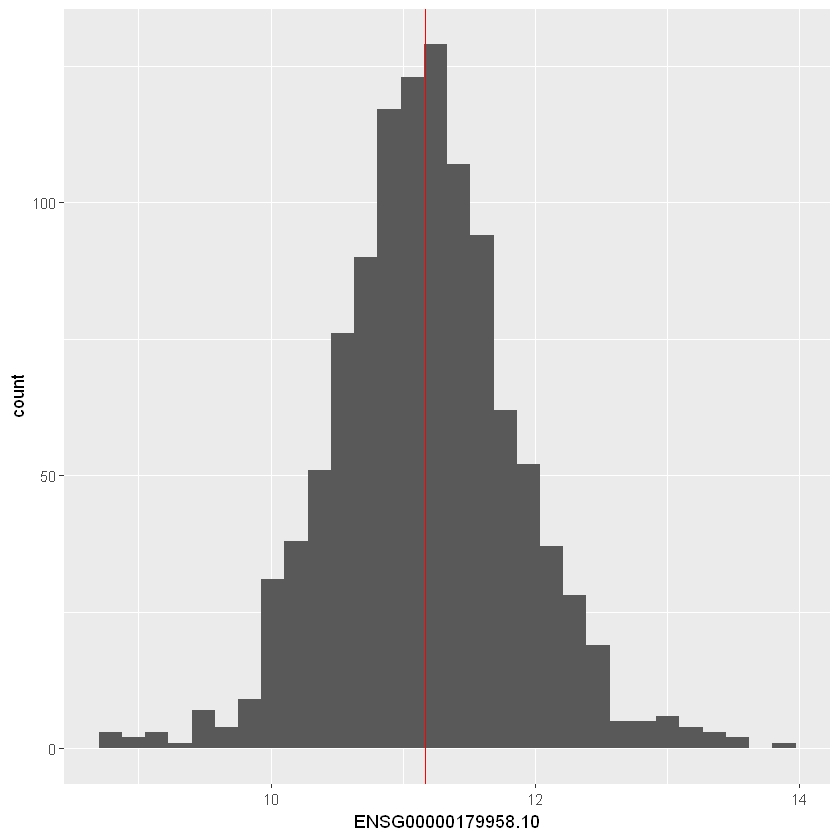

In [23]:
# Threshold = mean 
threshold <- mean(cox.data$ENSG00000179958.10)

# Plot histogram of expression
cox.data %>% ggplot(aes(x=ENSG00000179958.10)) +
               geom_histogram() +
               geom_vline(xintercept = threshold, color="red")

In [24]:
# Subset the gene
km.data <- cox.data %>% 
           dplyr::select(OS.month,
                         Status,
                         ENSG00000179958.10) 

# Define the high-exp and low-exp group 
km.data <- km.data %>% 
           mutate(group = ifelse(ENSG00000179958.10 >= threshold, 
                                 "High", "Low"))

head(km.data)

,OS.month,Status,ENSG00000179958.10,group
,<dbl>,<dbl>,<dbl>,<chr>
TCGA-E9-A1RH-01A-21R-A169-07,47.233,0,11.87794,High
TCGA-C8-A26W-01A-11R-A16F-07,12.700,0,10.93806,Low
TCGA-AO-A0JJ-01A-11R-A056-07,62.900,0,10.95484,Low
TCGA-BH-A0HO-01A-11R-A034-07,2.533,0,10.60282,Low
TCGA-BH-A18F-01A-11R-A12D-07,33.367,0,11.98324,High
TCGA-C8-A12O-01A-11R-A115-07,12.833,0,12.36625,High


载入需要的程辑包：ggpubr




载入程辑包：'survminer'


The following object is masked from 'package:survival':

    myeloma




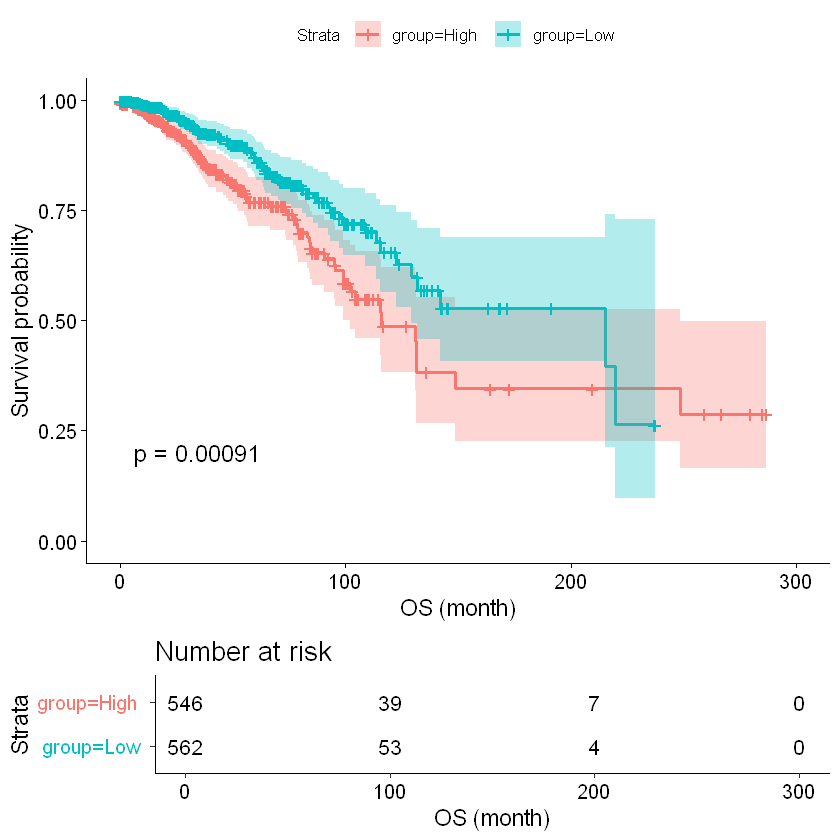

In [25]:
library(survminer)

# Fit a survival model based on high/low expression group
survival_fit <- survfit(Surv(OS.month, Status) ~ group, 
                        data = km.data)

# Survival plot
ggsurvplot(survival_fit, 
           data = km.data,
           xlab = "OS (month)", ylab = "Survival probability",
           conf.int = TRUE, 
           pval = TRUE,
           risk.table = TRUE)